In [2]:
directory = '/global/cscratch1/sd/husni/OpsimRuns'
runs = ['baseline2018a, colossus_2664, colossus_2665, colossus_2667, kraken_2026, kraken_2035, kraken_2036, mothra_2045, pontus_2002, pontus_2489, pontus_2502']

In [22]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)
import random

Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [574]:
runName = '/global/cscratch1/sd/husni/OpsimRuns/feature_baseline_update_10yrsv2'
opsdb = db.Database(runName+'.db', defaultTable='observations')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric(m5Col="fivesigmadepth")
sqlconstraint = 'filter="r" and survey_id = 1 and night < 365'
stackerList = []
#slicer3 = slicers.BaseSlicer()
slicer3 = slicers.HealpixSlicer(lonCol='RA', latCol='dec', nside=nside)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer3, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint filter="r" and survey_id = 1 and night < 365 for columns ['RA', 'dec', 'fivesigmadepth']
Found 44050 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [378]:
runNamesDict

{'/global/cscratch1/sd/husni/OpsimRuns/baseline2018a': 25,
 '/global/cscratch1/sd/husni/OpsimRuns/colossus_2664': 23,
 '/global/cscratch1/sd/husni/OpsimRuns/colossus_2665': 23,
 '/global/cscratch1/sd/husni/OpsimRuns/colossus_2667': 23.5,
 '/global/cscratch1/sd/husni/OpsimRuns/kraken_2026': 25,
 '/global/cscratch1/sd/husni/OpsimRuns/kraken_2035': 25,
 '/global/cscratch1/sd/husni/OpsimRuns/pontus_2002': 24.5,
 '/global/cscratch1/sd/husni/OpsimRuns/pontus_2489': 24.5}

In [5]:
runName = '/global/cscratch1/sd/husni/OpsimRuns/nexus_2097'

In [101]:
runName

'/global/cscratch1/sd/husni/OpsimRuns/nexus_2097'

In [113]:
import lsst.sims.maf.batches as batches

In [14]:
airmass = opsdb.fetchMetricData(['airmass'])
nights = opsdb.fetchMetricData(['night'])

In [16]:
airmass = np.array([air[0] for air in airmass])
nights = np.array([night[0] for night in nights])

In [144]:
def plotHist(runName, criteria, days=365, proposalId=3, band="r"):
    directory = '/global/cscratch1/sd/husni/OpsimRuns/'
    opsdb = db.OpsimDatabase(directory+runName+'.db')
    criteria = opsdb.fetchMetricData([criteria])
    criteria = np.array([crit[0] for crit in criteria])
    proposalIds = opsdb.fetchMetricData(['proposalId'])
    proposalIds = np.array([prop[0] for prop in proposalIds])
    filtering = opsdb.fetchMetricData(['filter'])
    filtering = np.array([filt[0] for filt in filtering])
    nights = opsdb.fetchMetricData(['night'])
    nights = np.array([night[0] for night in nights])
    conditions = np.logical_and.reduce((proposalIds==proposalId, filtering==band, nights < days))
    plt.hist(np.log(criteria[conditions]), linewidth=2, label=runName, bins=100, density=True, alpha=0.2)
    plt.legend()

/global/homes/h/husni/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(-0.01, 0.25)

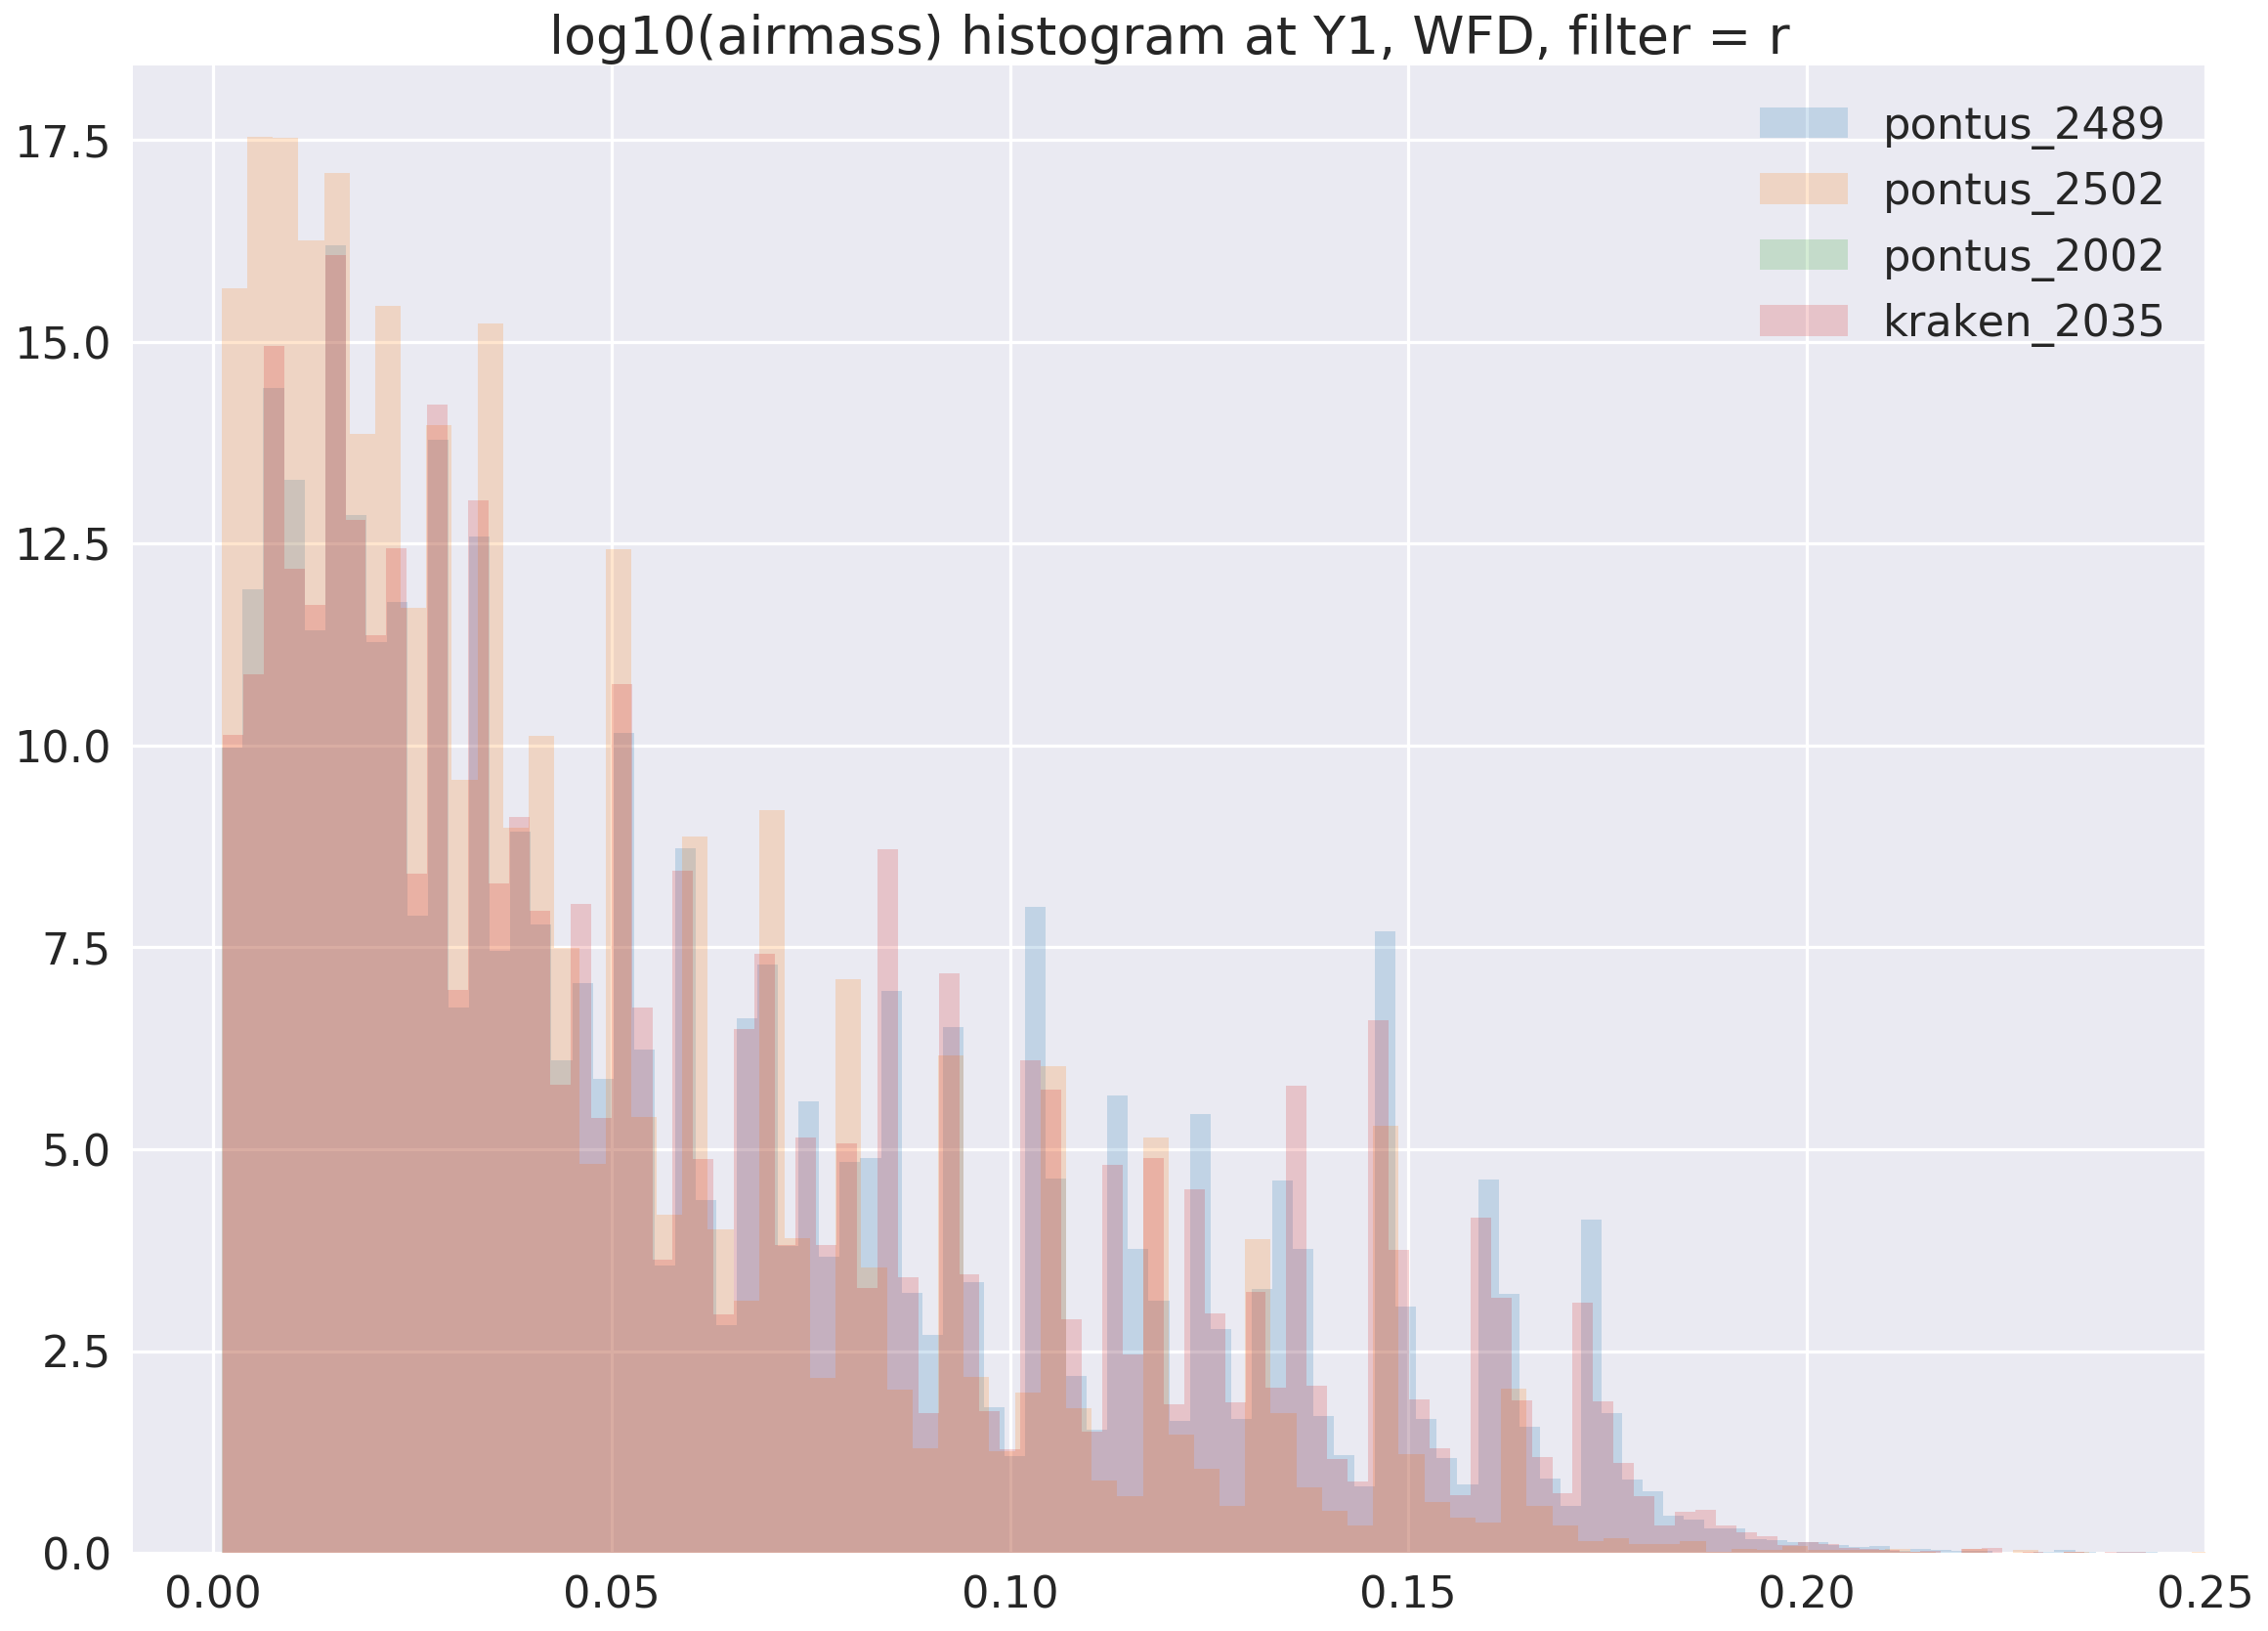

In [148]:
for runName in ['pontus_2489', 'pontus_2502', 'pontus_2002', 'kraken_2035']:
    plotHist(runName, 'airmass')
plt.title('log10(airmass) histogram at Y1, WFD, filter = r')
plt.xlim((-0.01,0.25))

/global/homes/h/husni/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(-0.01, 0.3)

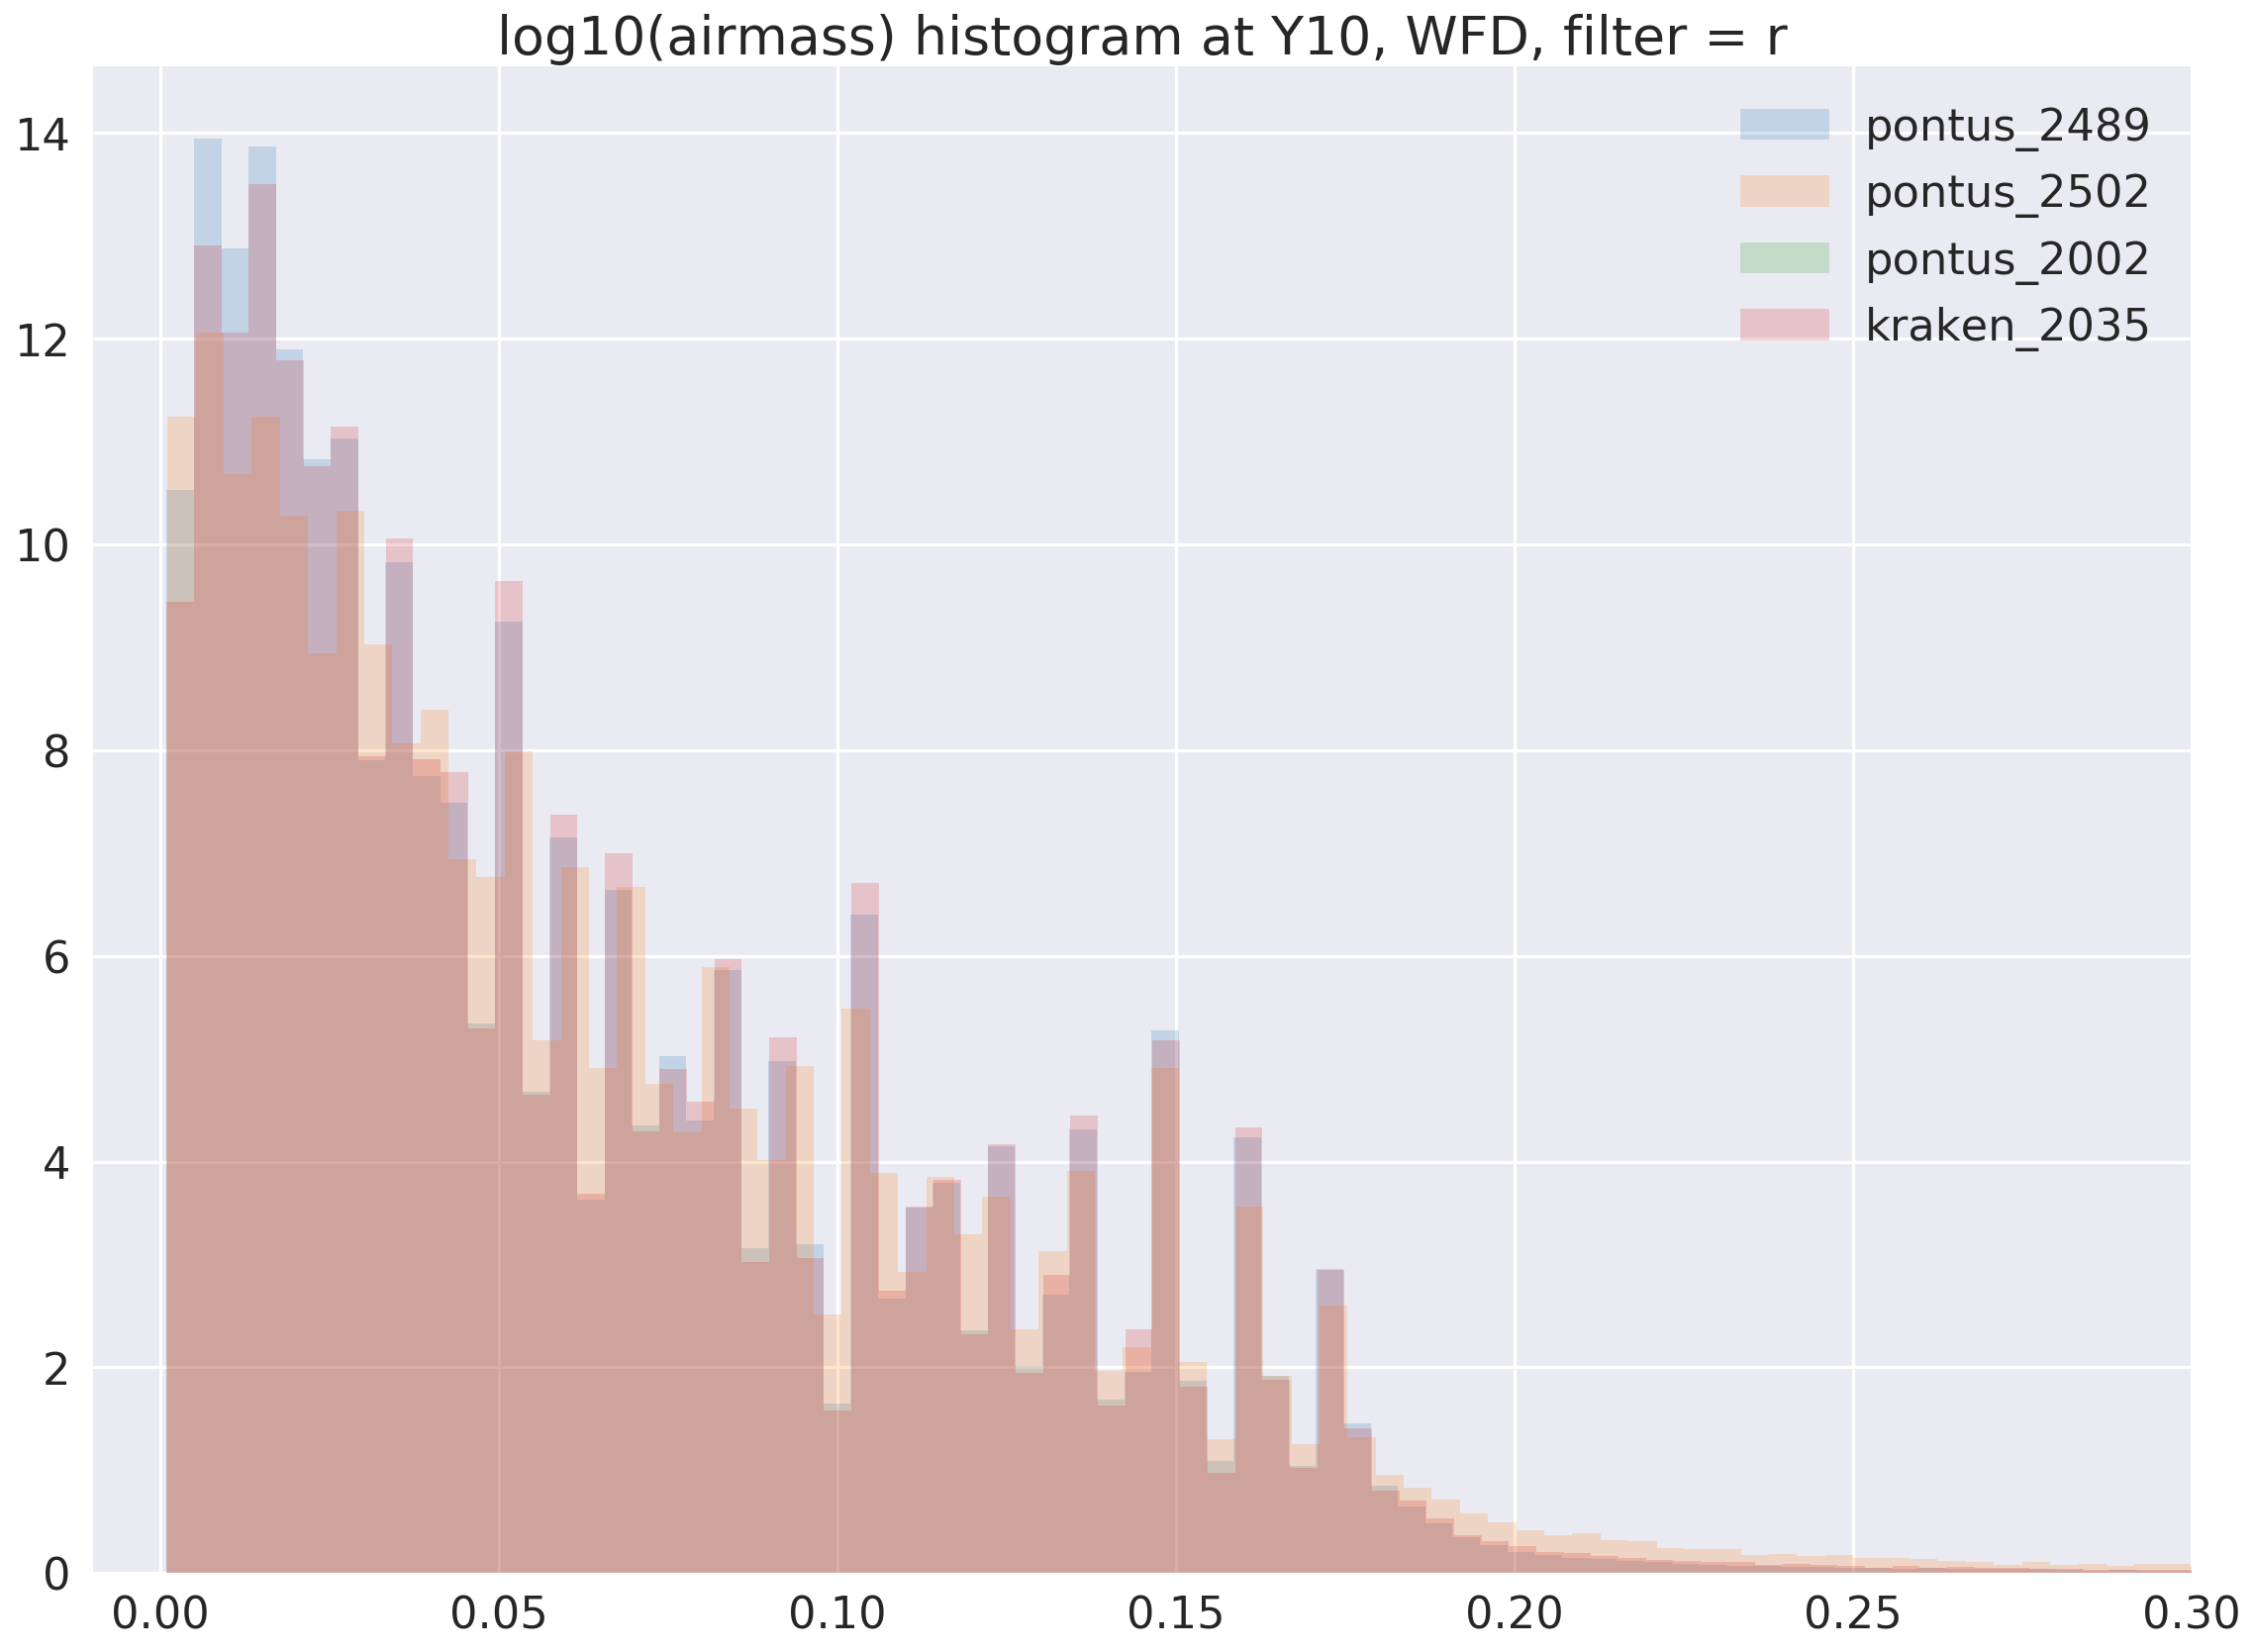

In [149]:
for runName in ['pontus_2489', 'pontus_2502', 'pontus_2002', 'kraken_2035']:
    plotHist(runName, 'airmass', days=50000)
plt.title('log10(airmass) histogram at Y10, WFD, filter = r')
plt.xlim((-0.01, 0.3))

/global/homes/h/husni/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(0, 2)

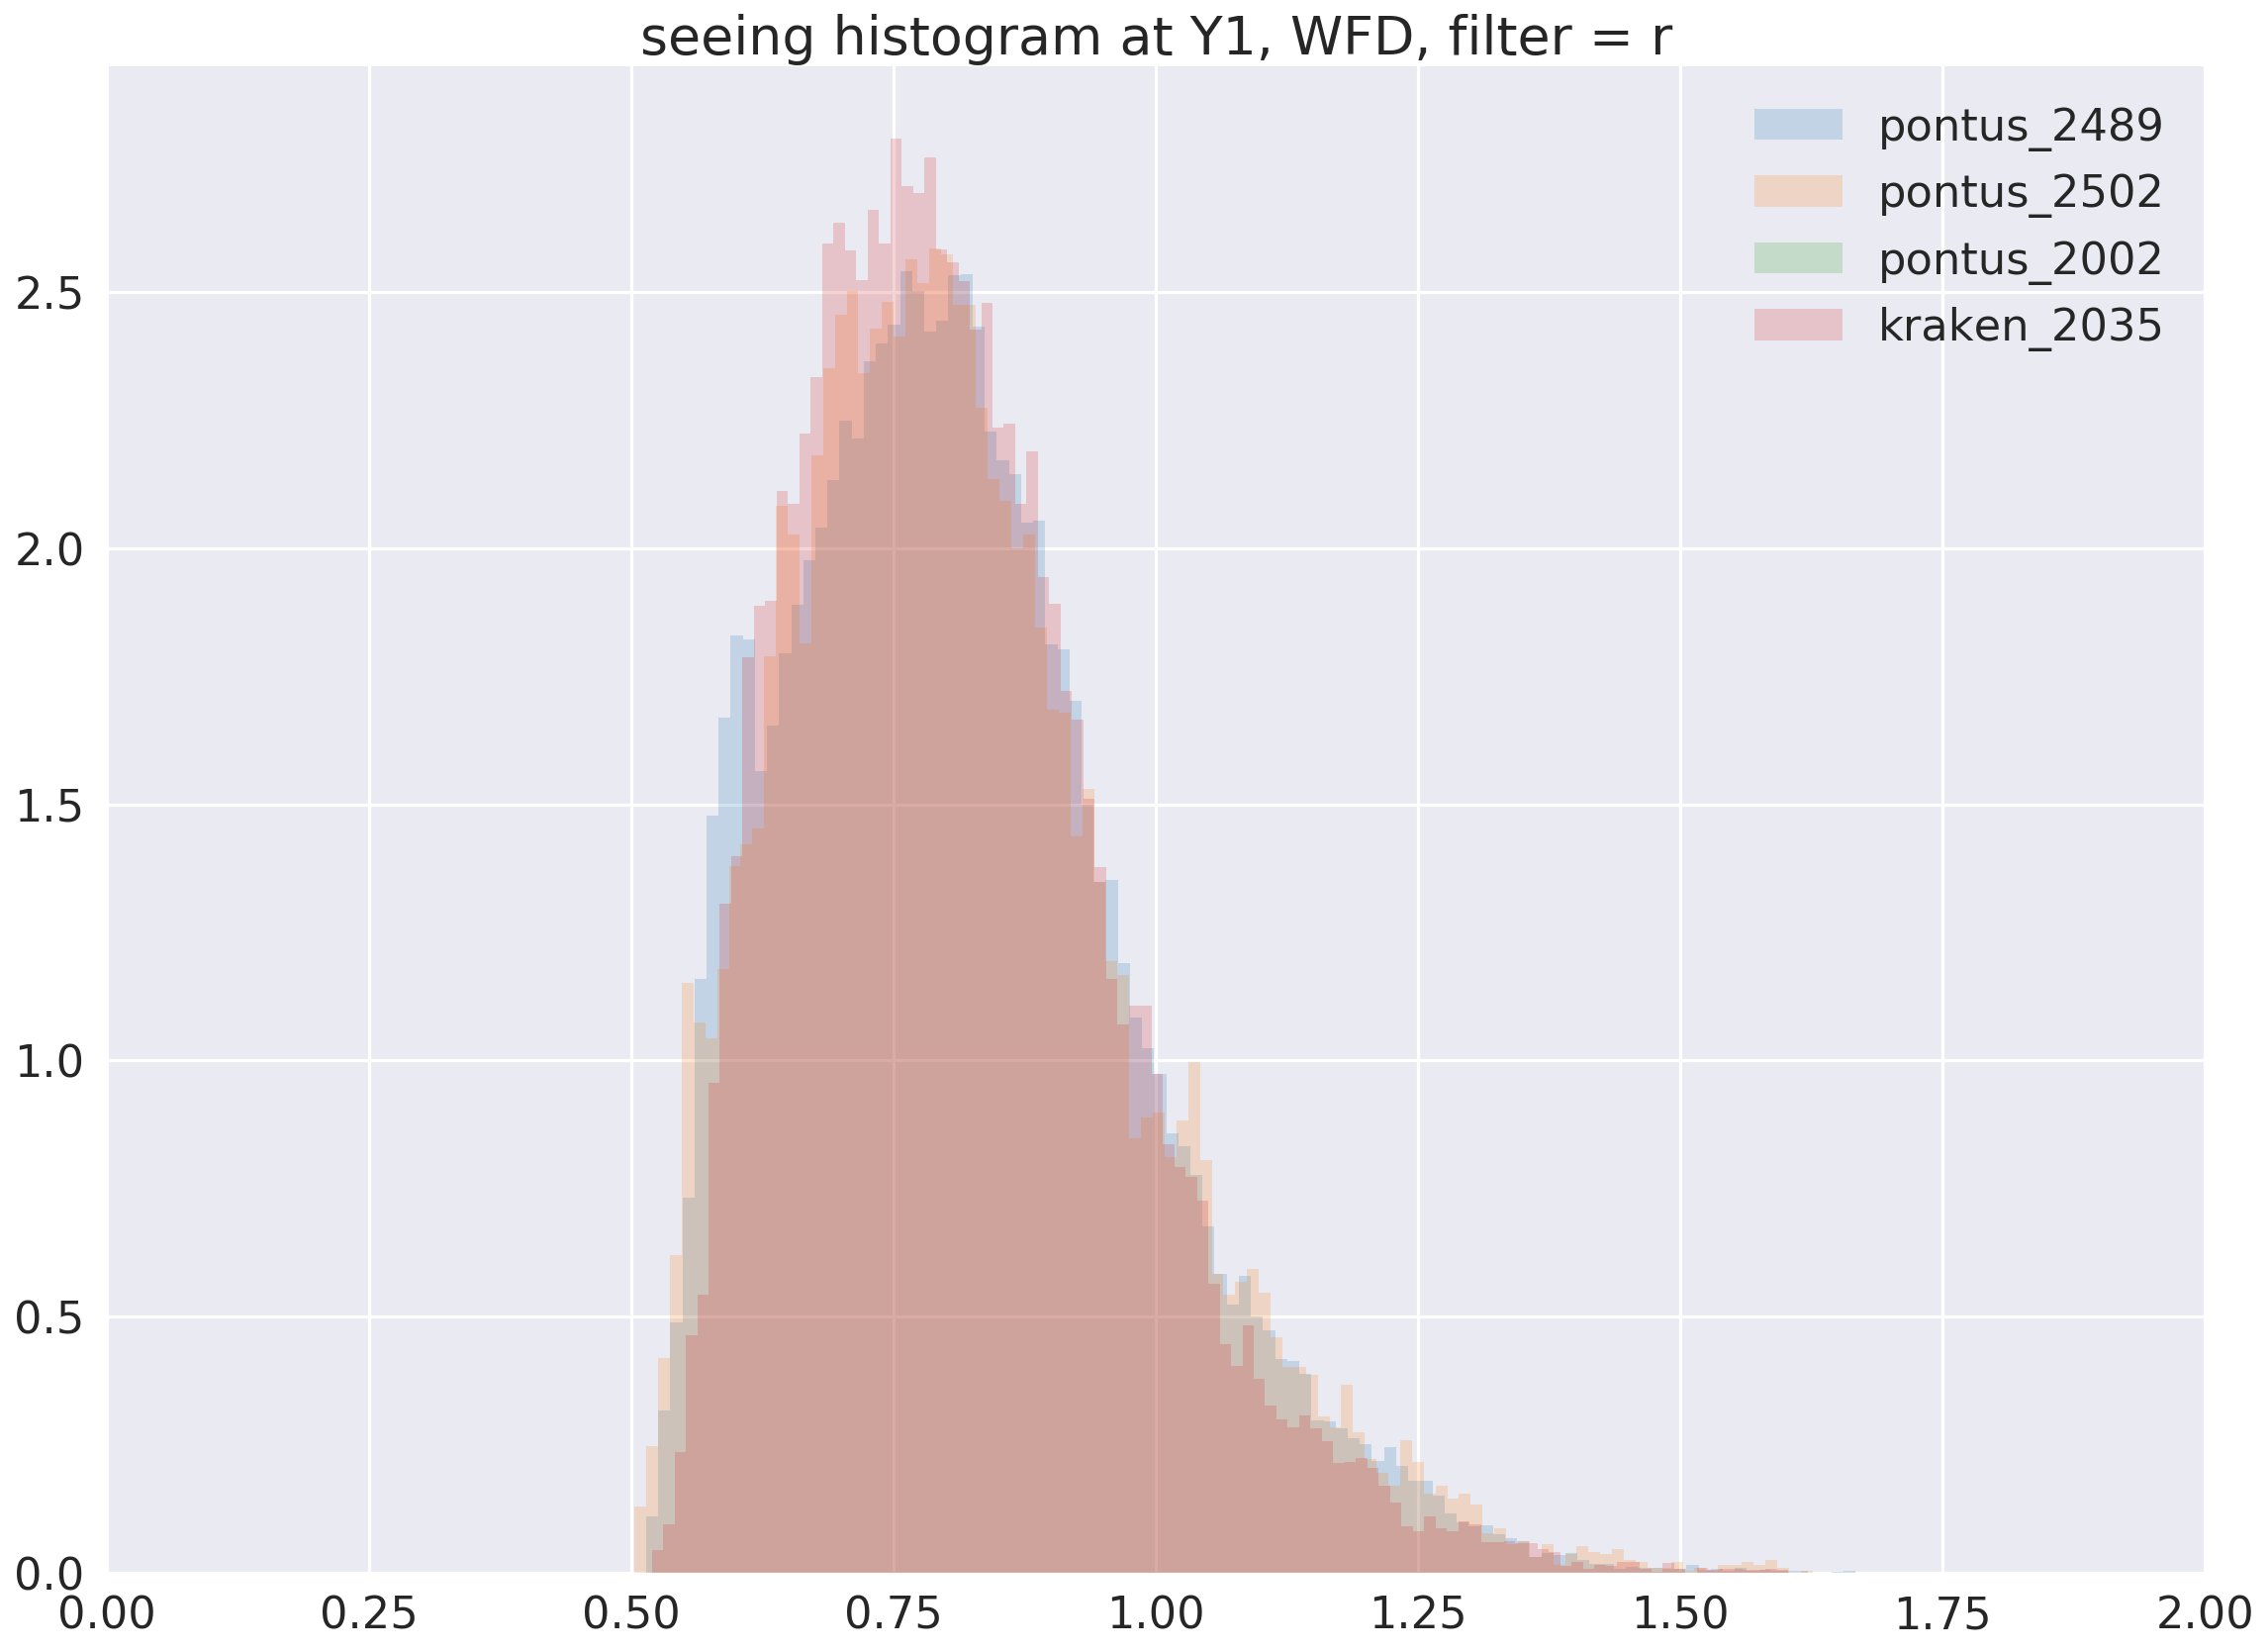

In [125]:
for runName in ['pontus_2489', 'pontus_2502', 'pontus_2002', 'kraken_2035']:
    plotHist(runName, 'seeingFwhmEff')
plt.title('seeing histogram at Y1, WFD, filter = r')
plt.xlim((0,2))

/global/homes/h/husni/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(0, 2)

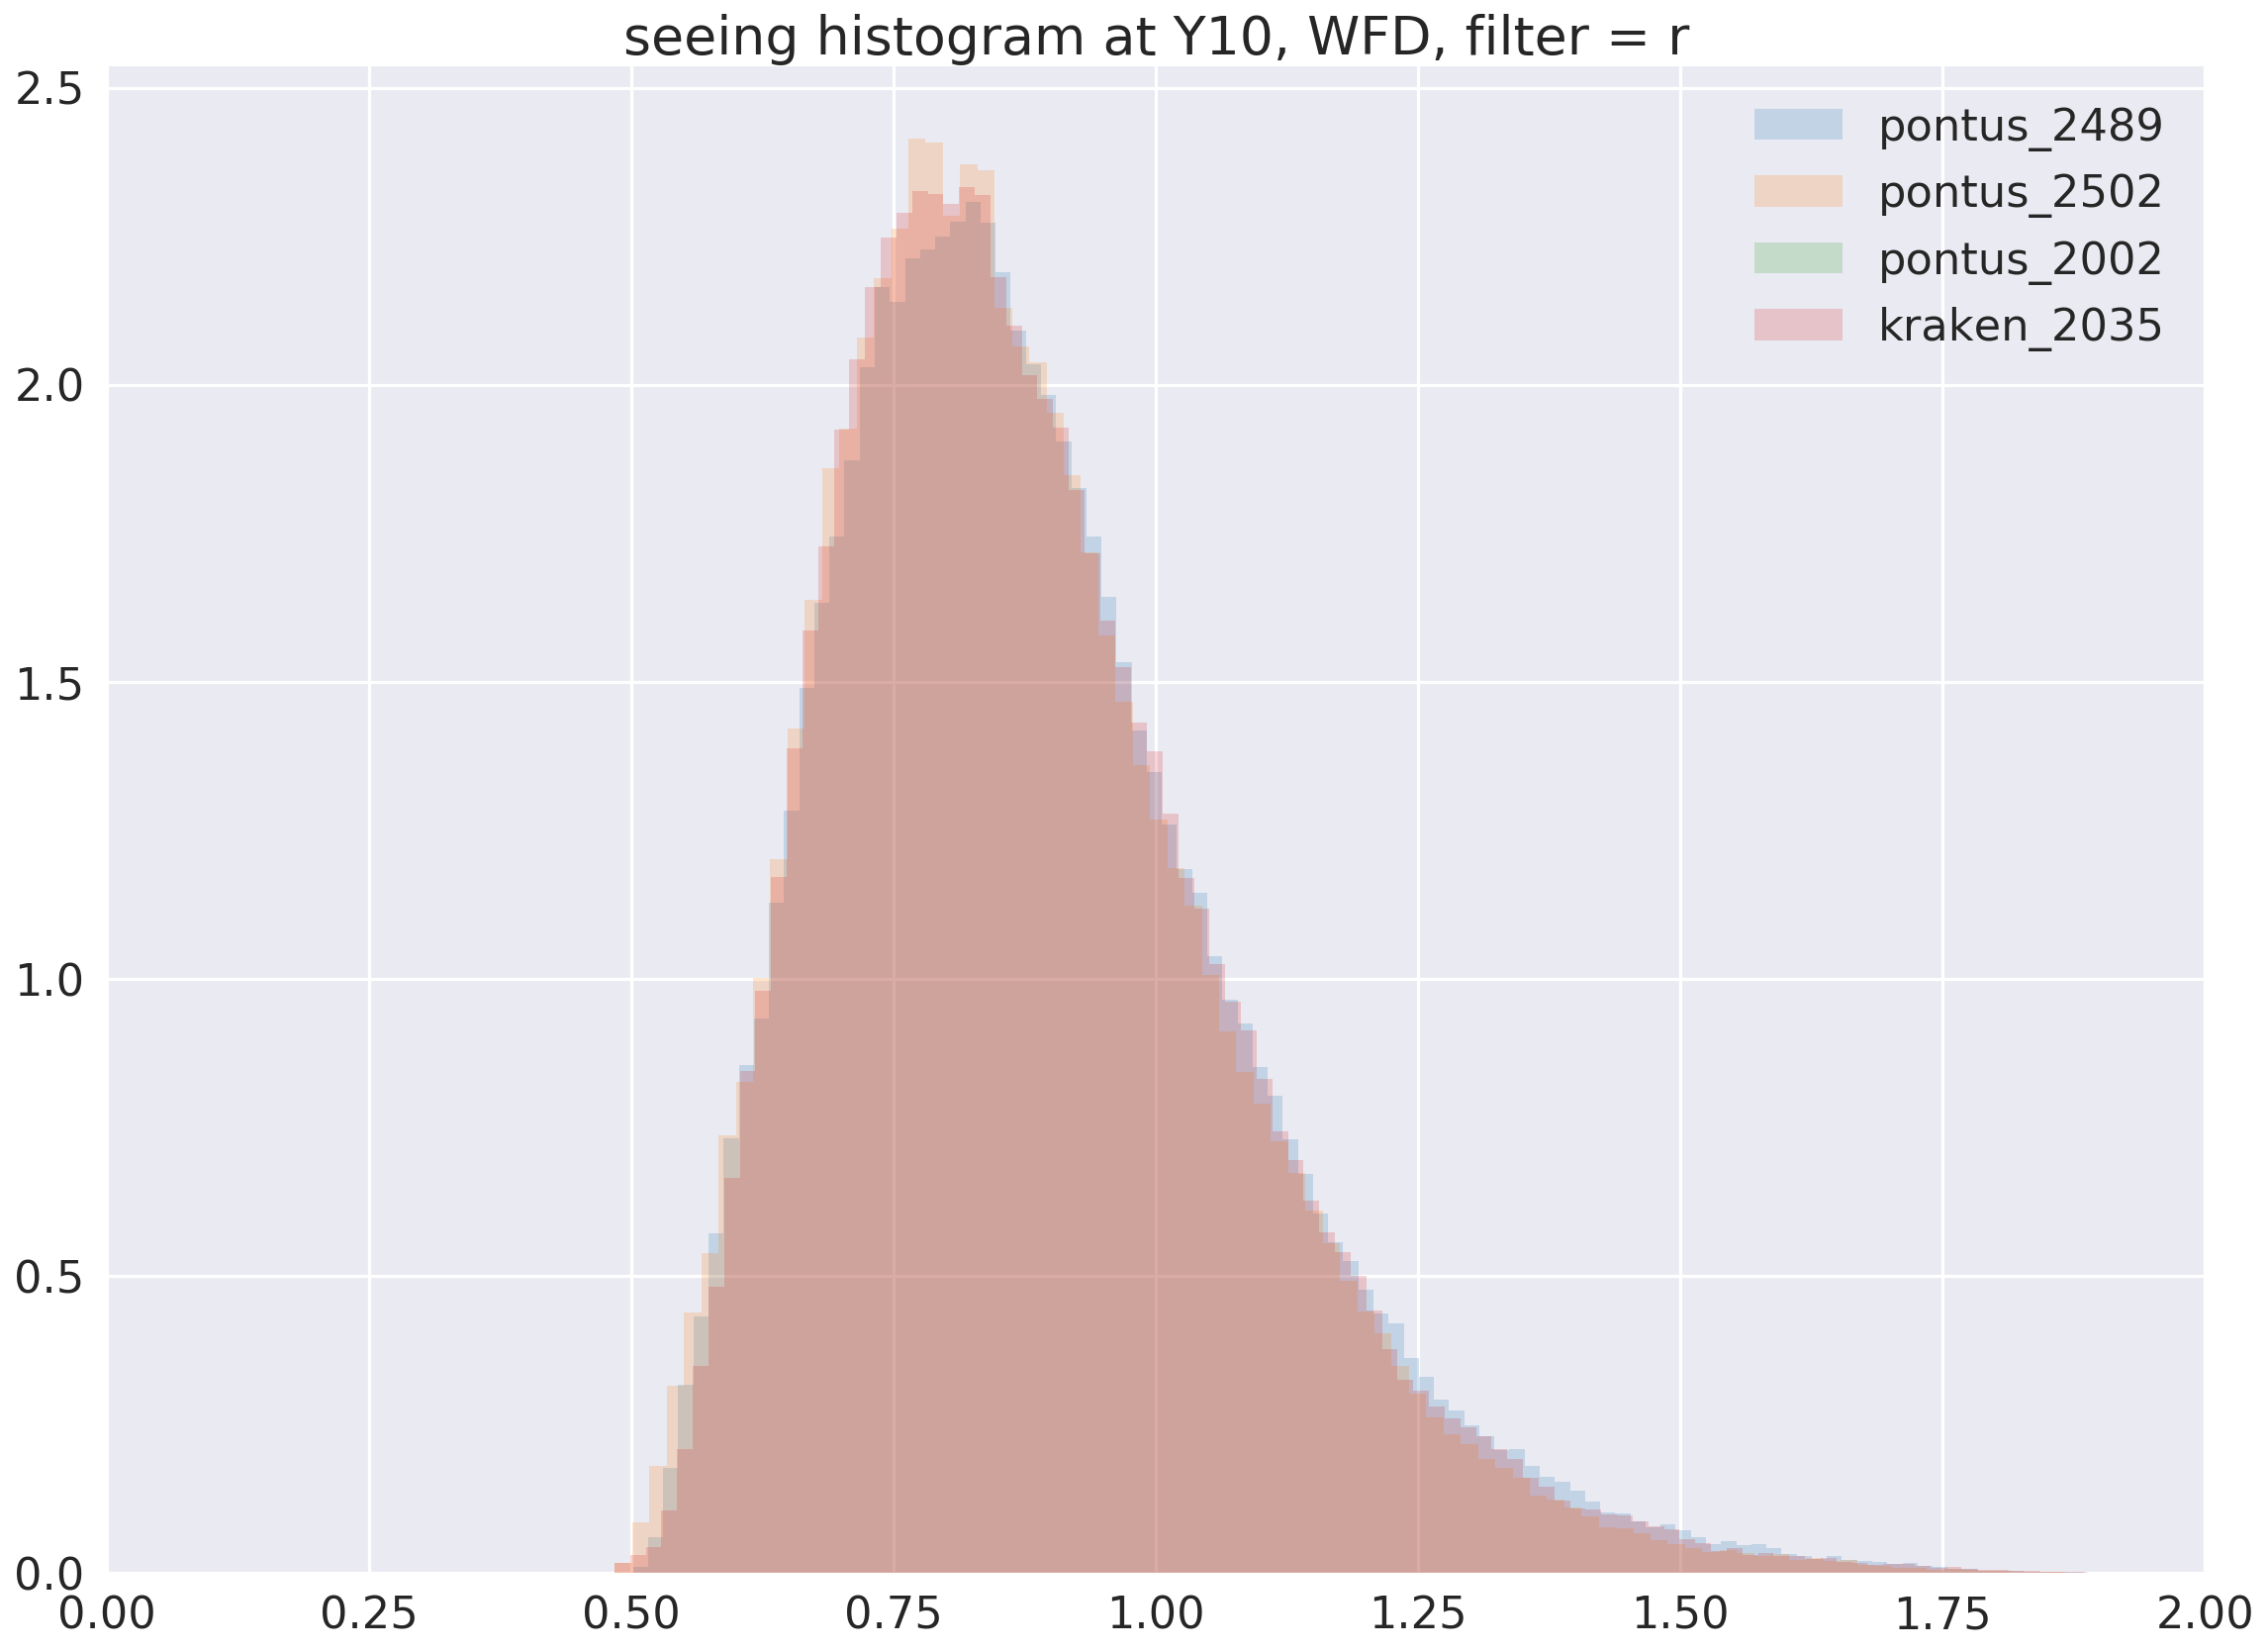

In [126]:
for runName in ['pontus_2489', 'pontus_2502', 'pontus_2002', 'kraken_2035']:
    plotHist(runName, 'seeingFwhmEff', days=50000)
plt.title('seeing histogram at Y10, WFD, filter = r')
plt.xlim((0,2))

In [95]:
runName = 'kraken_2035'

In [128]:
def plotCoaddHist(runName, days=365, proposalId=3):
    opsdb = db.OpsimDatabase(directory+runName+'.db')
    outDir = 'dither_test'
    resultsDb = db.ResultsDb(outDir=outDir)
    nside = 128 
    myBundles = {}
    metric = metrics.Coaddm5Metric()
    sqlconstraint = 'filter = "r" and night < '+str(days)+' and proposalId = '+str(proposalId)
    stackerList = [stackers.RandomDitherFieldPerVisitStacker()]
    slicer = slicers.HealpixSlicer(lonCol='randomDitherFieldPerVisitRa', latCol='randomDitherFieldPerVisitDec', nside=nside)
    myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint, 
                                                           stackerList=stackerList, runName=runName,
                                                           metadata='field dither')
    bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll() 
    bundle = (myBundles['field dither'])
    plt.hist(bundle.metricValues[bundle.metricValues.mask==False], label=runName, bins=100, density=True, alpha=0.8, histtype='step', linewidth=2)
    plt.legend(loc='upper left')

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 365 and proposalId = 3 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 33796 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 365 and proposalId = 1 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 41768 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 365 and proposalId = 3 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 52608 visits
Running:  ['field dit

(24.5, 27)

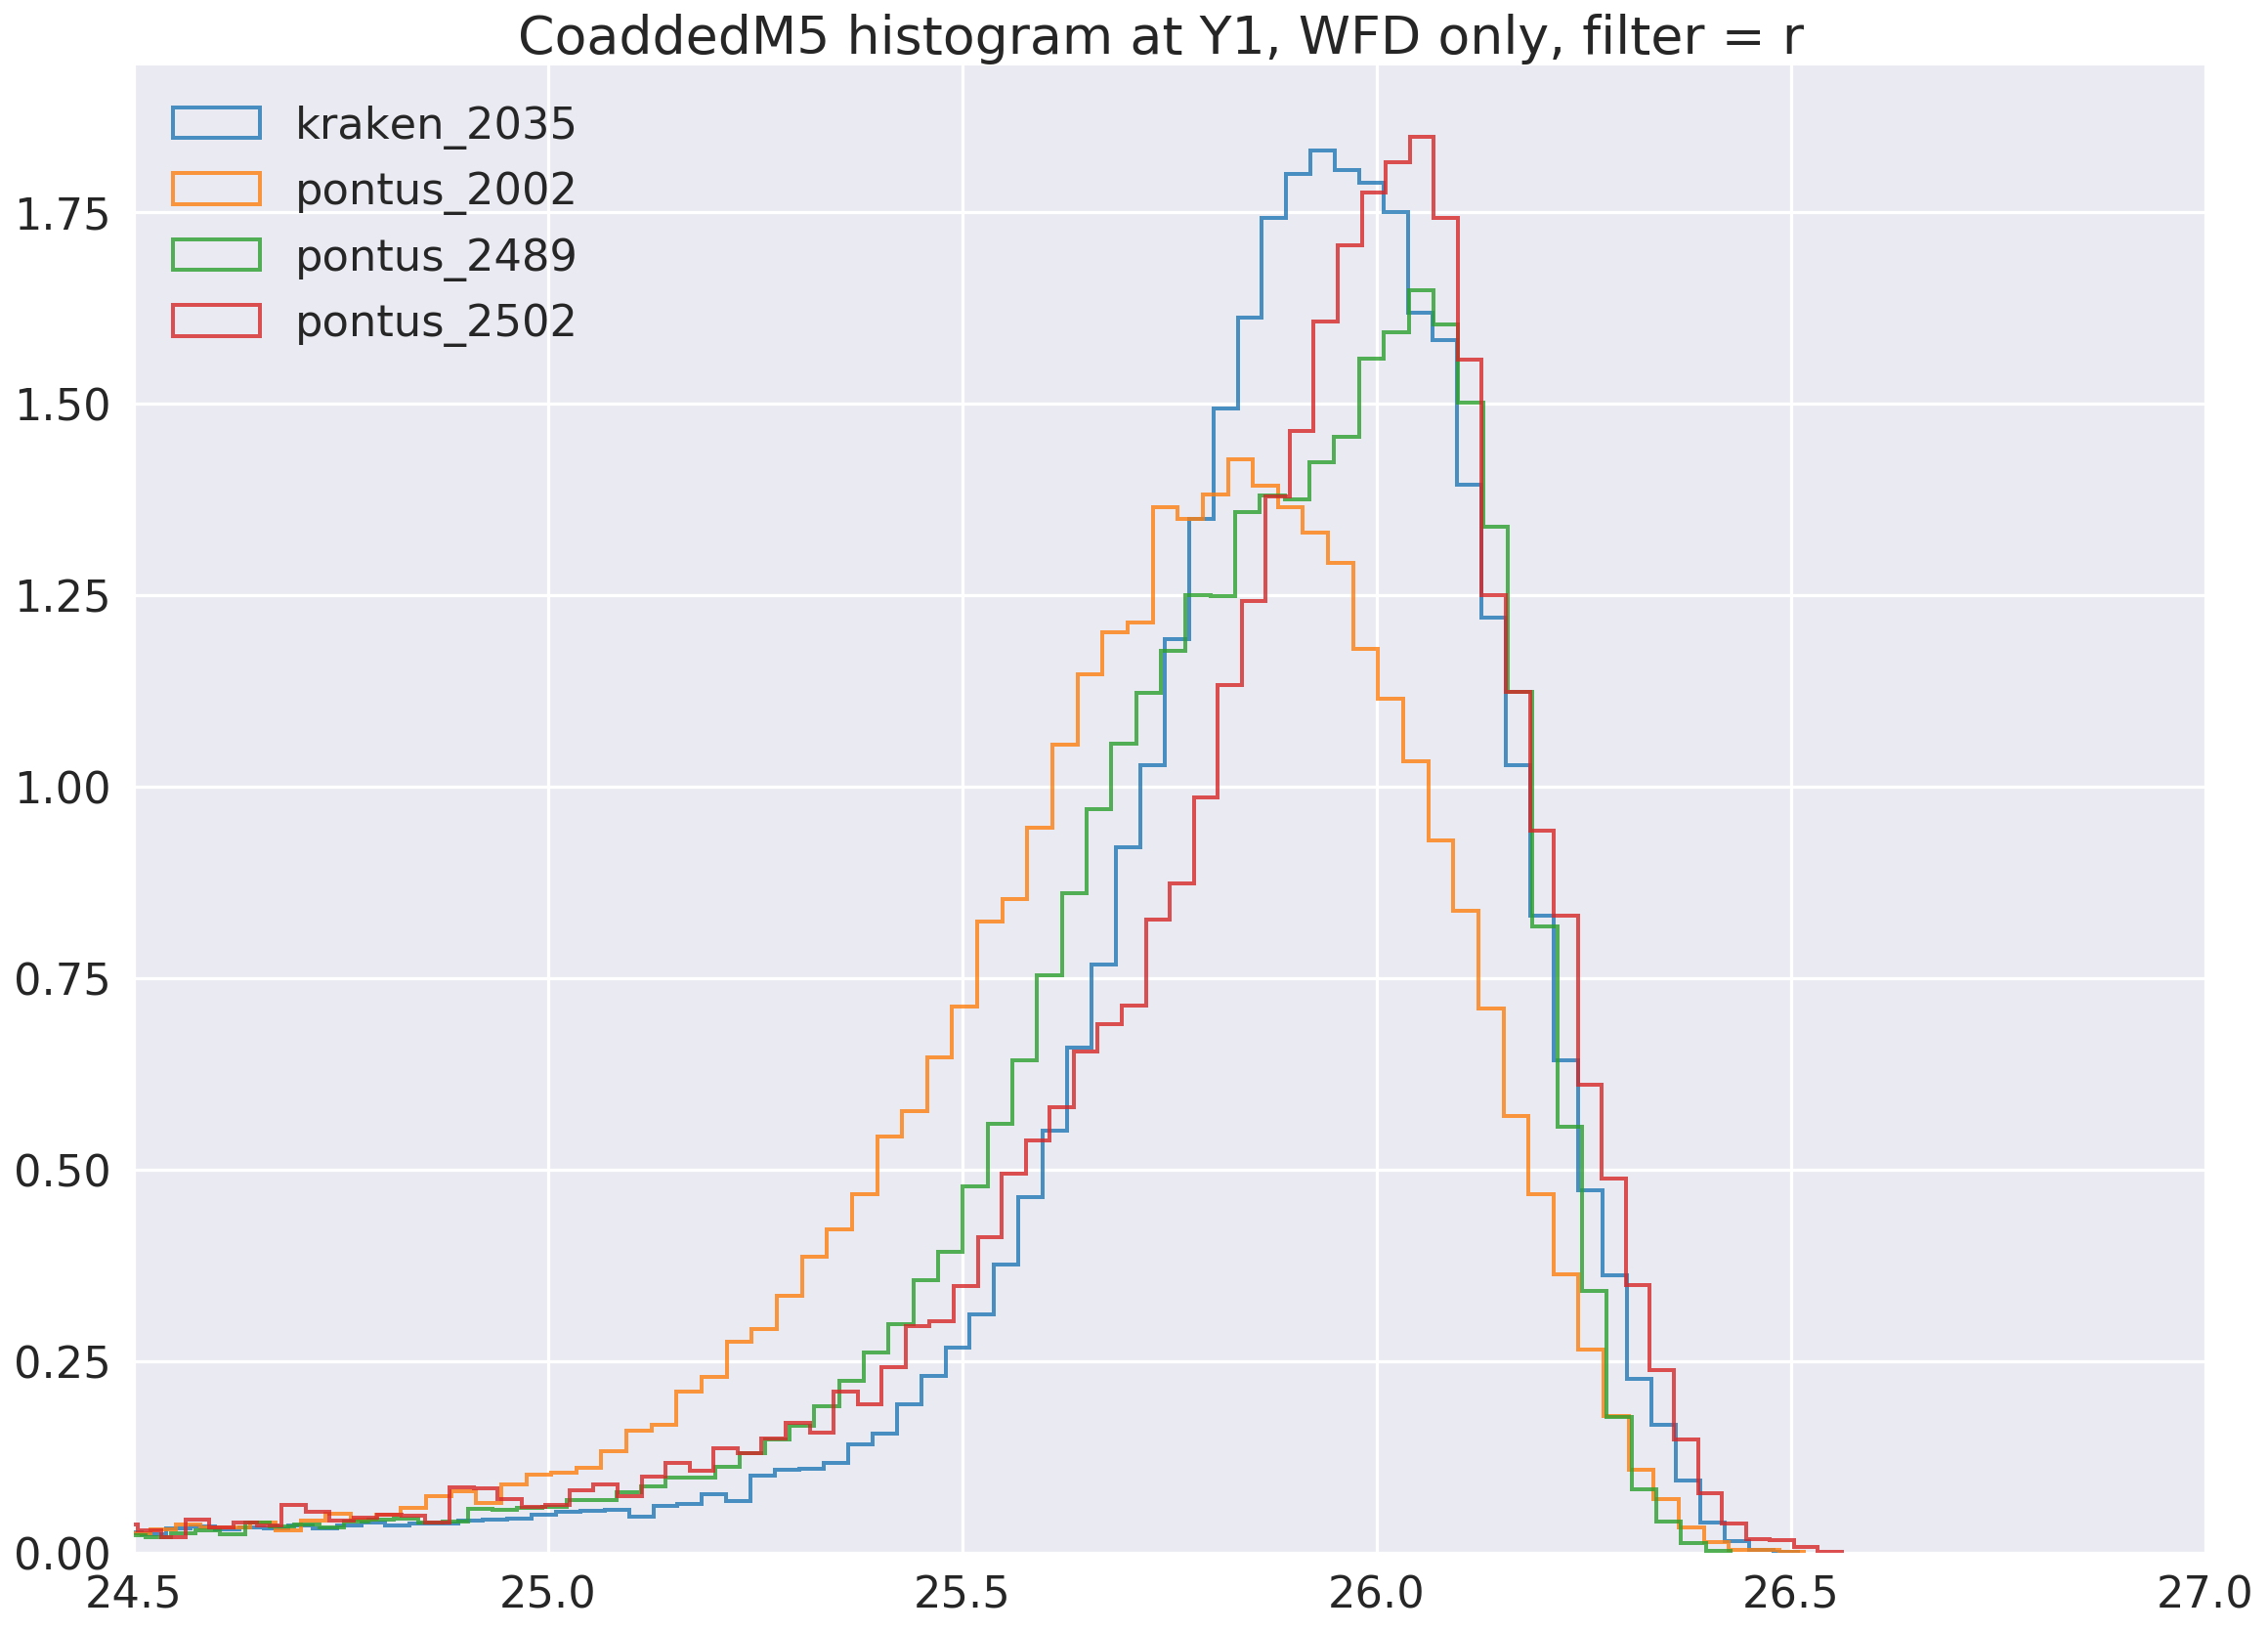

In [131]:
for runName, proposalId in zip(['kraken_2035', 'pontus_2002', 'pontus_2489', 'pontus_2502'],[3,1,3,3]):
    plotCoaddHist(runName=runName, proposalId=proposalId)
plt.title('CoaddedM5 histogram at Y1, WFD only, filter = r ')
plt.xlim((24.5,27))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 50000 and proposalId = 3 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 441808 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 50000 and proposalId = 1 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 501934 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 50000 and proposalId = 3 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 646134 visits
Running:  ['

(26, 28)

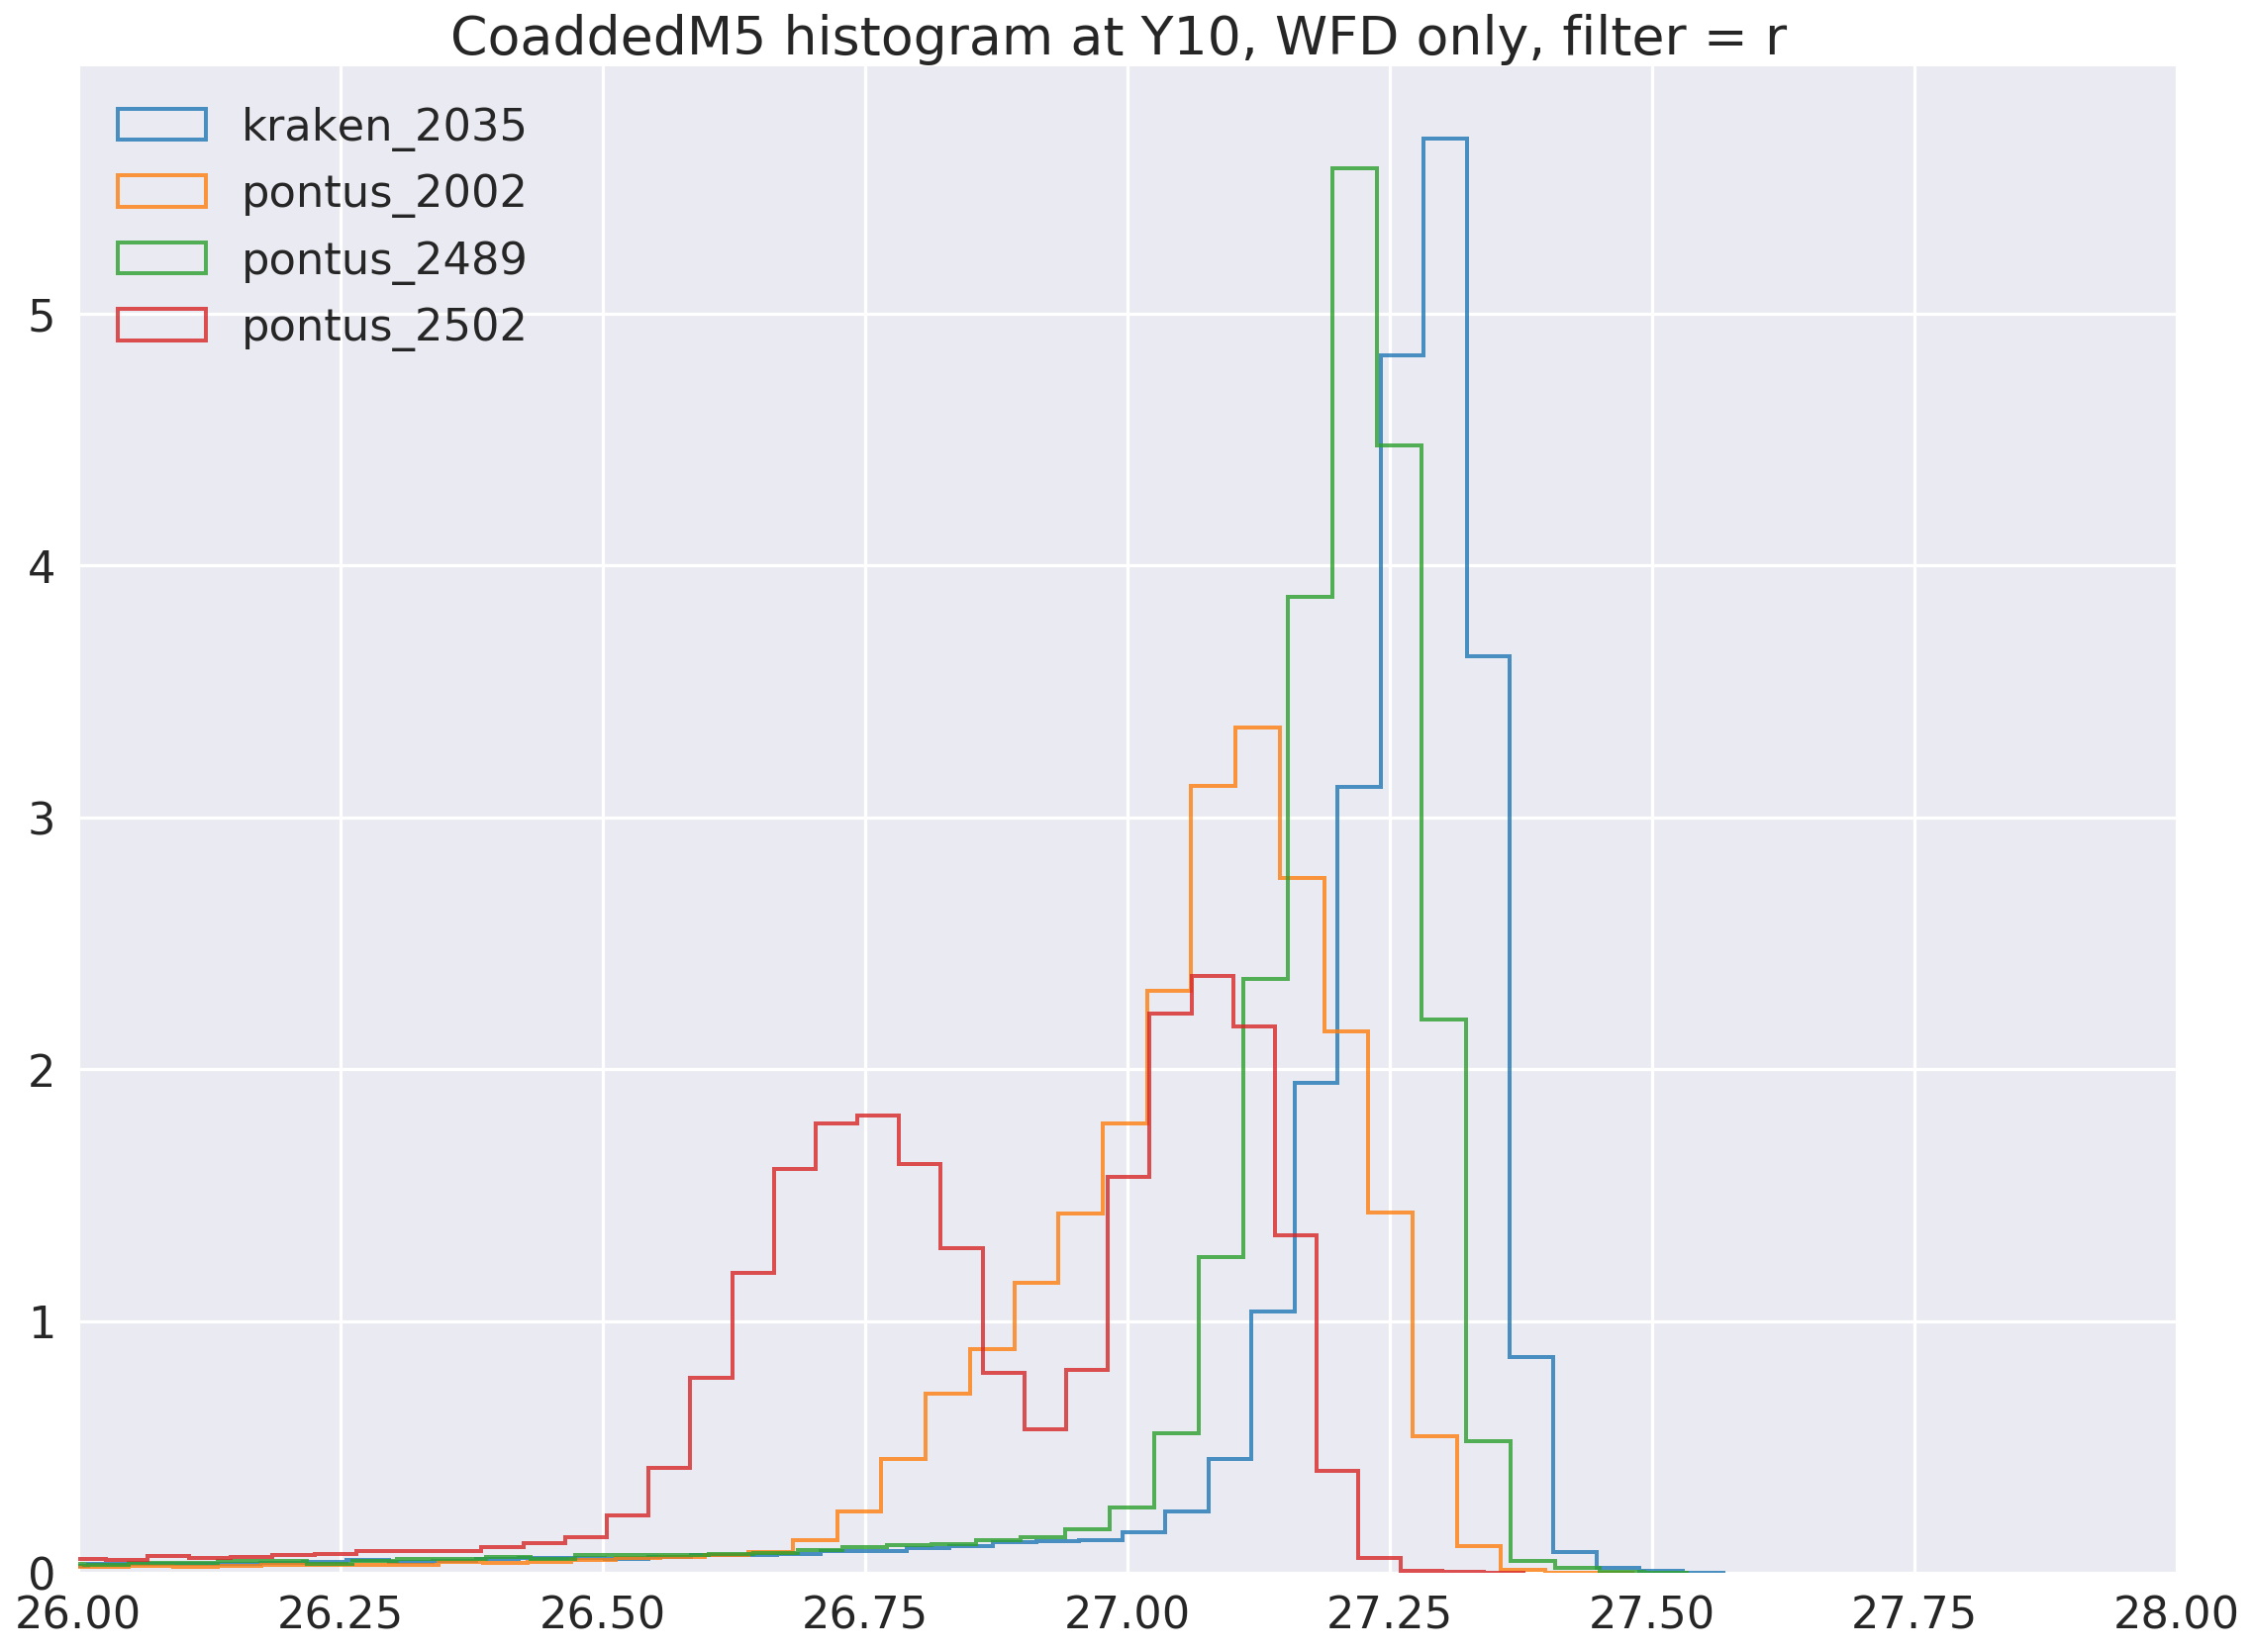

In [132]:
for runName, proposalId in zip(['kraken_2035', 'pontus_2002', 'pontus_2489', 'pontus_2502'],[3,1,3,3]):
    plotCoaddHist(runName=runName, days=50000, proposalId=proposalId)
plt.title('CoaddedM5 histogram at Y10, WFD only, filter = r ')
plt.xlim((26,28))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night < 365 and proposalId = 2 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 1793 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night < 365 and proposalId = 2" constraint now.
monopole: 27.3281  dipole: lon: 75.0591, lat: -54.1903, amp: 0.201197
Plotting complete.
Help on method plotAll in module lsst.sims.maf.metricBundles.metricBundleGroup:

plotAll(savefig=True, outfileSuffix=None, figformat='pdf', dpi=600, thumbnail=True, closefigs=True) method of lsst.sims.maf.metricBundles.metricBundleGroup.MetricBundleGroup instance
    Generate all the plots for all the metricBundles in bundleDict.
    
    Generating all ploots, for all MetricBundles, at this point, assumes that
    clearMemory was False.
    
    Paramet

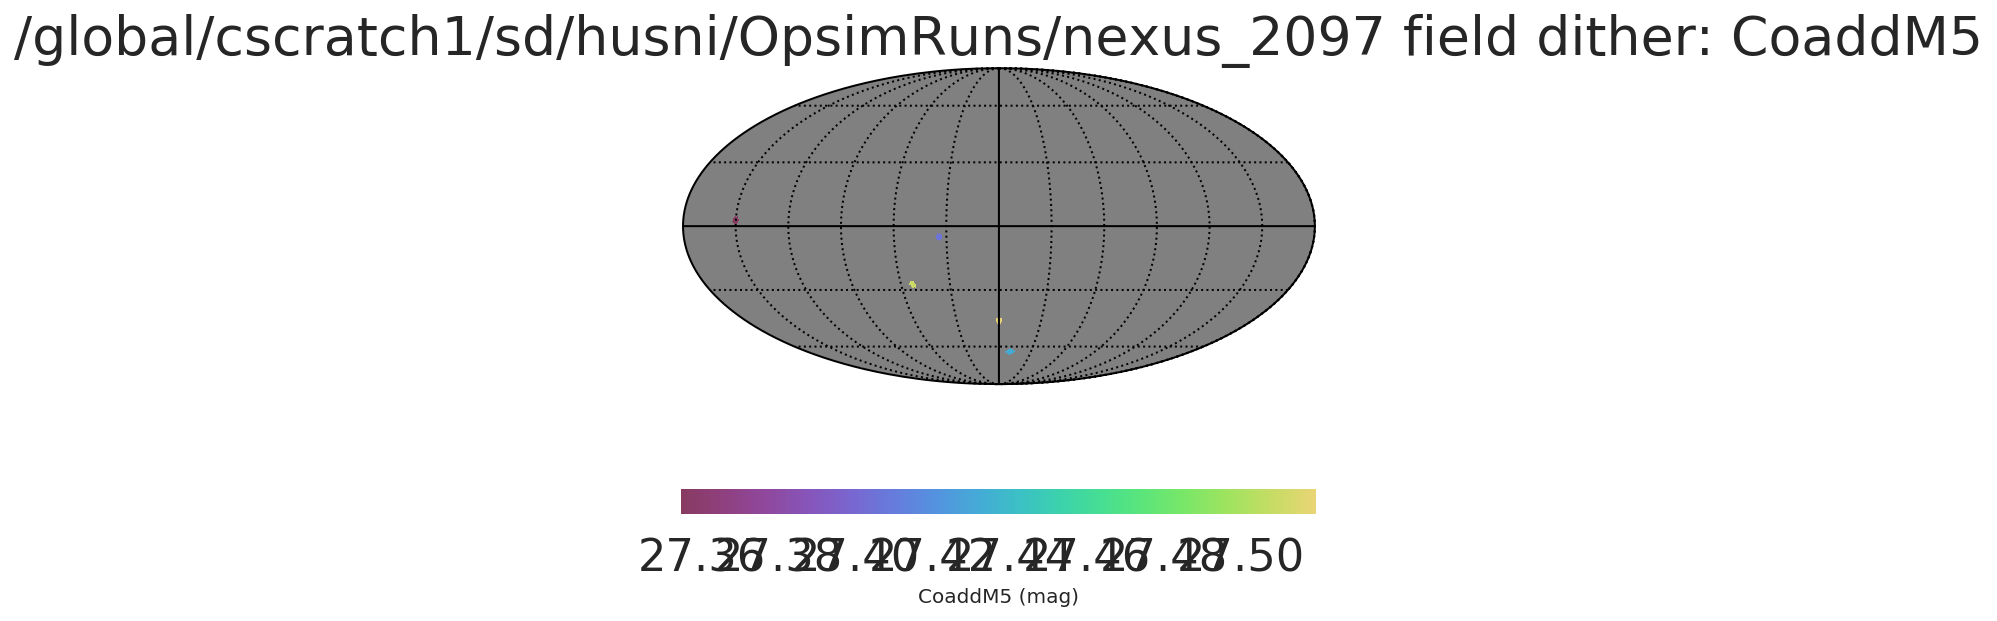

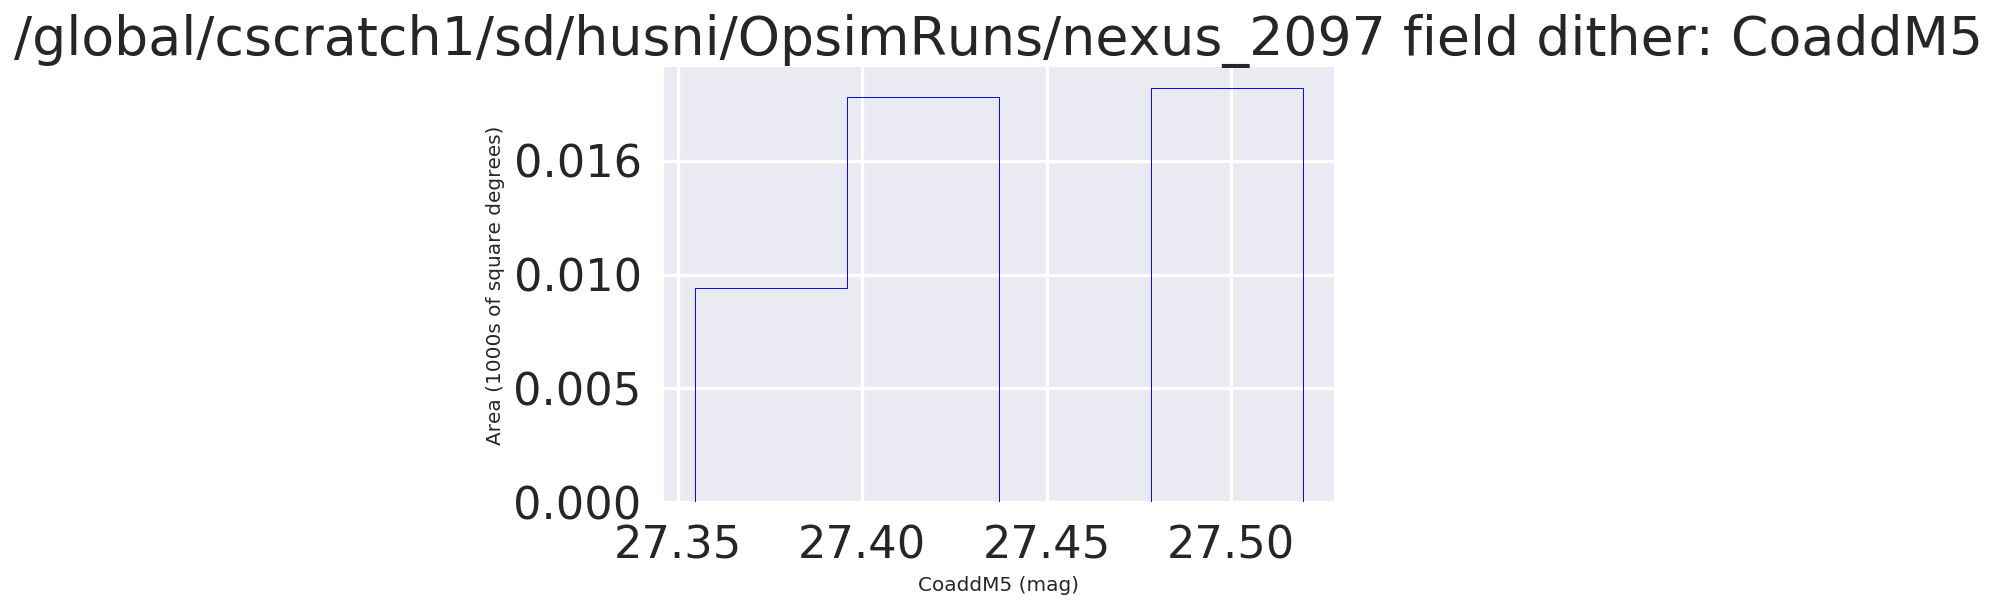

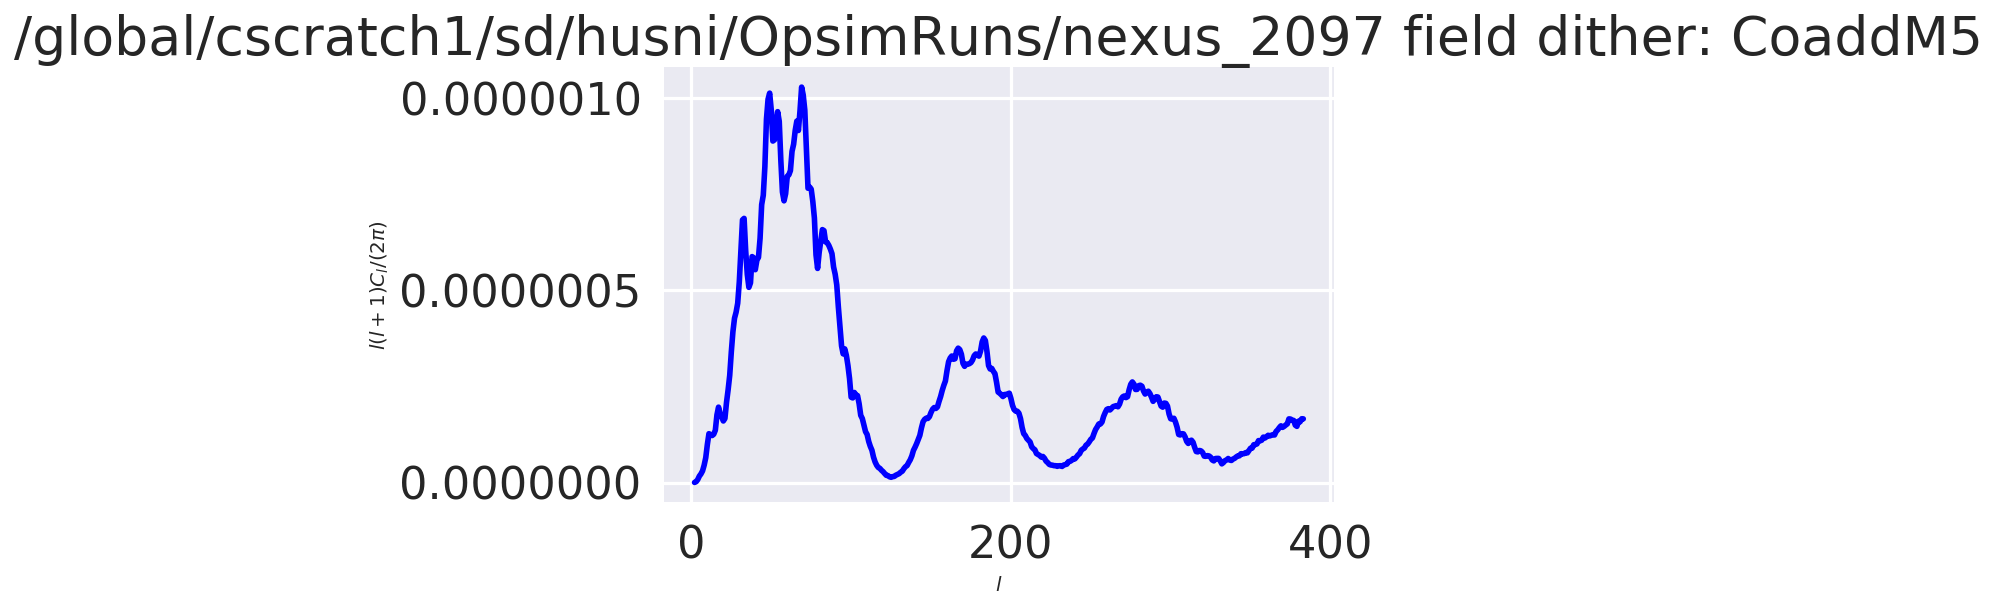

In [8]:
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric()
sqlconstraint = 'filter = "r" and night < 365 and proposalId = 2'
stackerList = []
slicer = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec', nside=nside)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 
bgroup.plotAll(closefigs=False)
help(bgroup.plotAll)

In [10]:
bundle = myBundles['field dither']
bundle.metricValues

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

In [13]:
bundle.metric.reduceOrder

In [105]:
vmin = 24

In [106]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>vmin), bundle.metricValues.data<31)

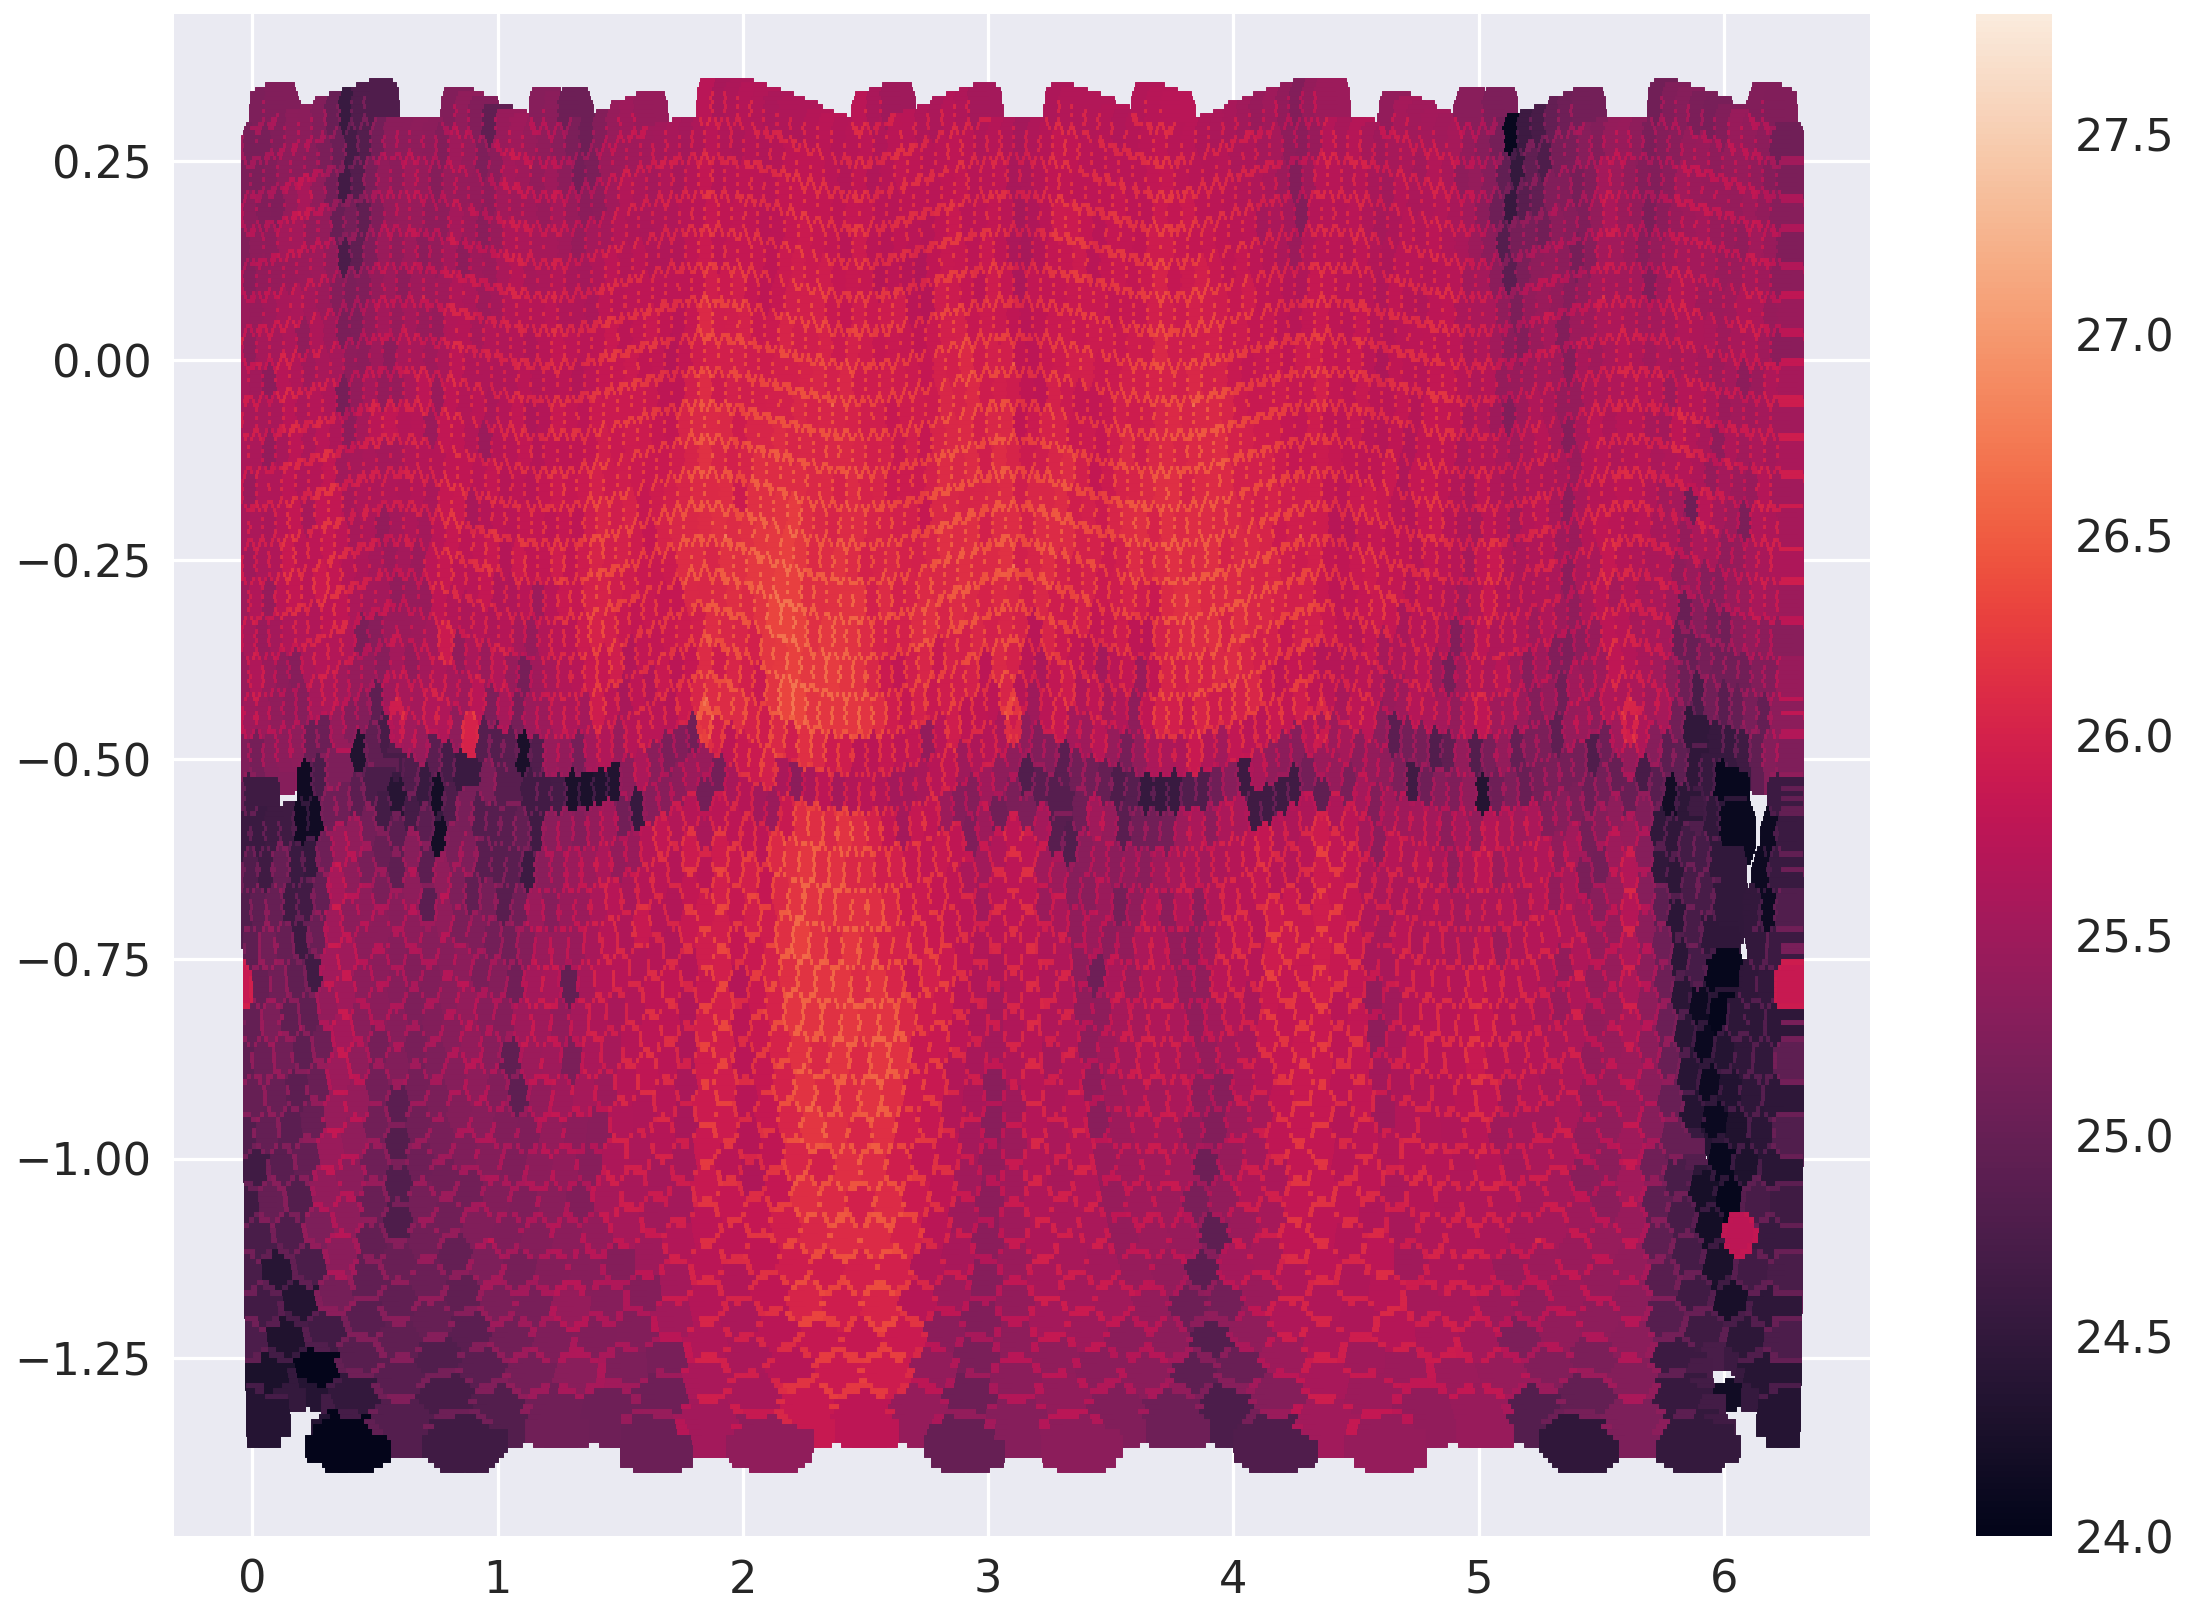

In [107]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=vmin,vmax=27.8,marker=',')
plt.colorbar()

In [108]:
runNamesDict[runName] = vmin

NameError: name 'runNamesDict' is not defined

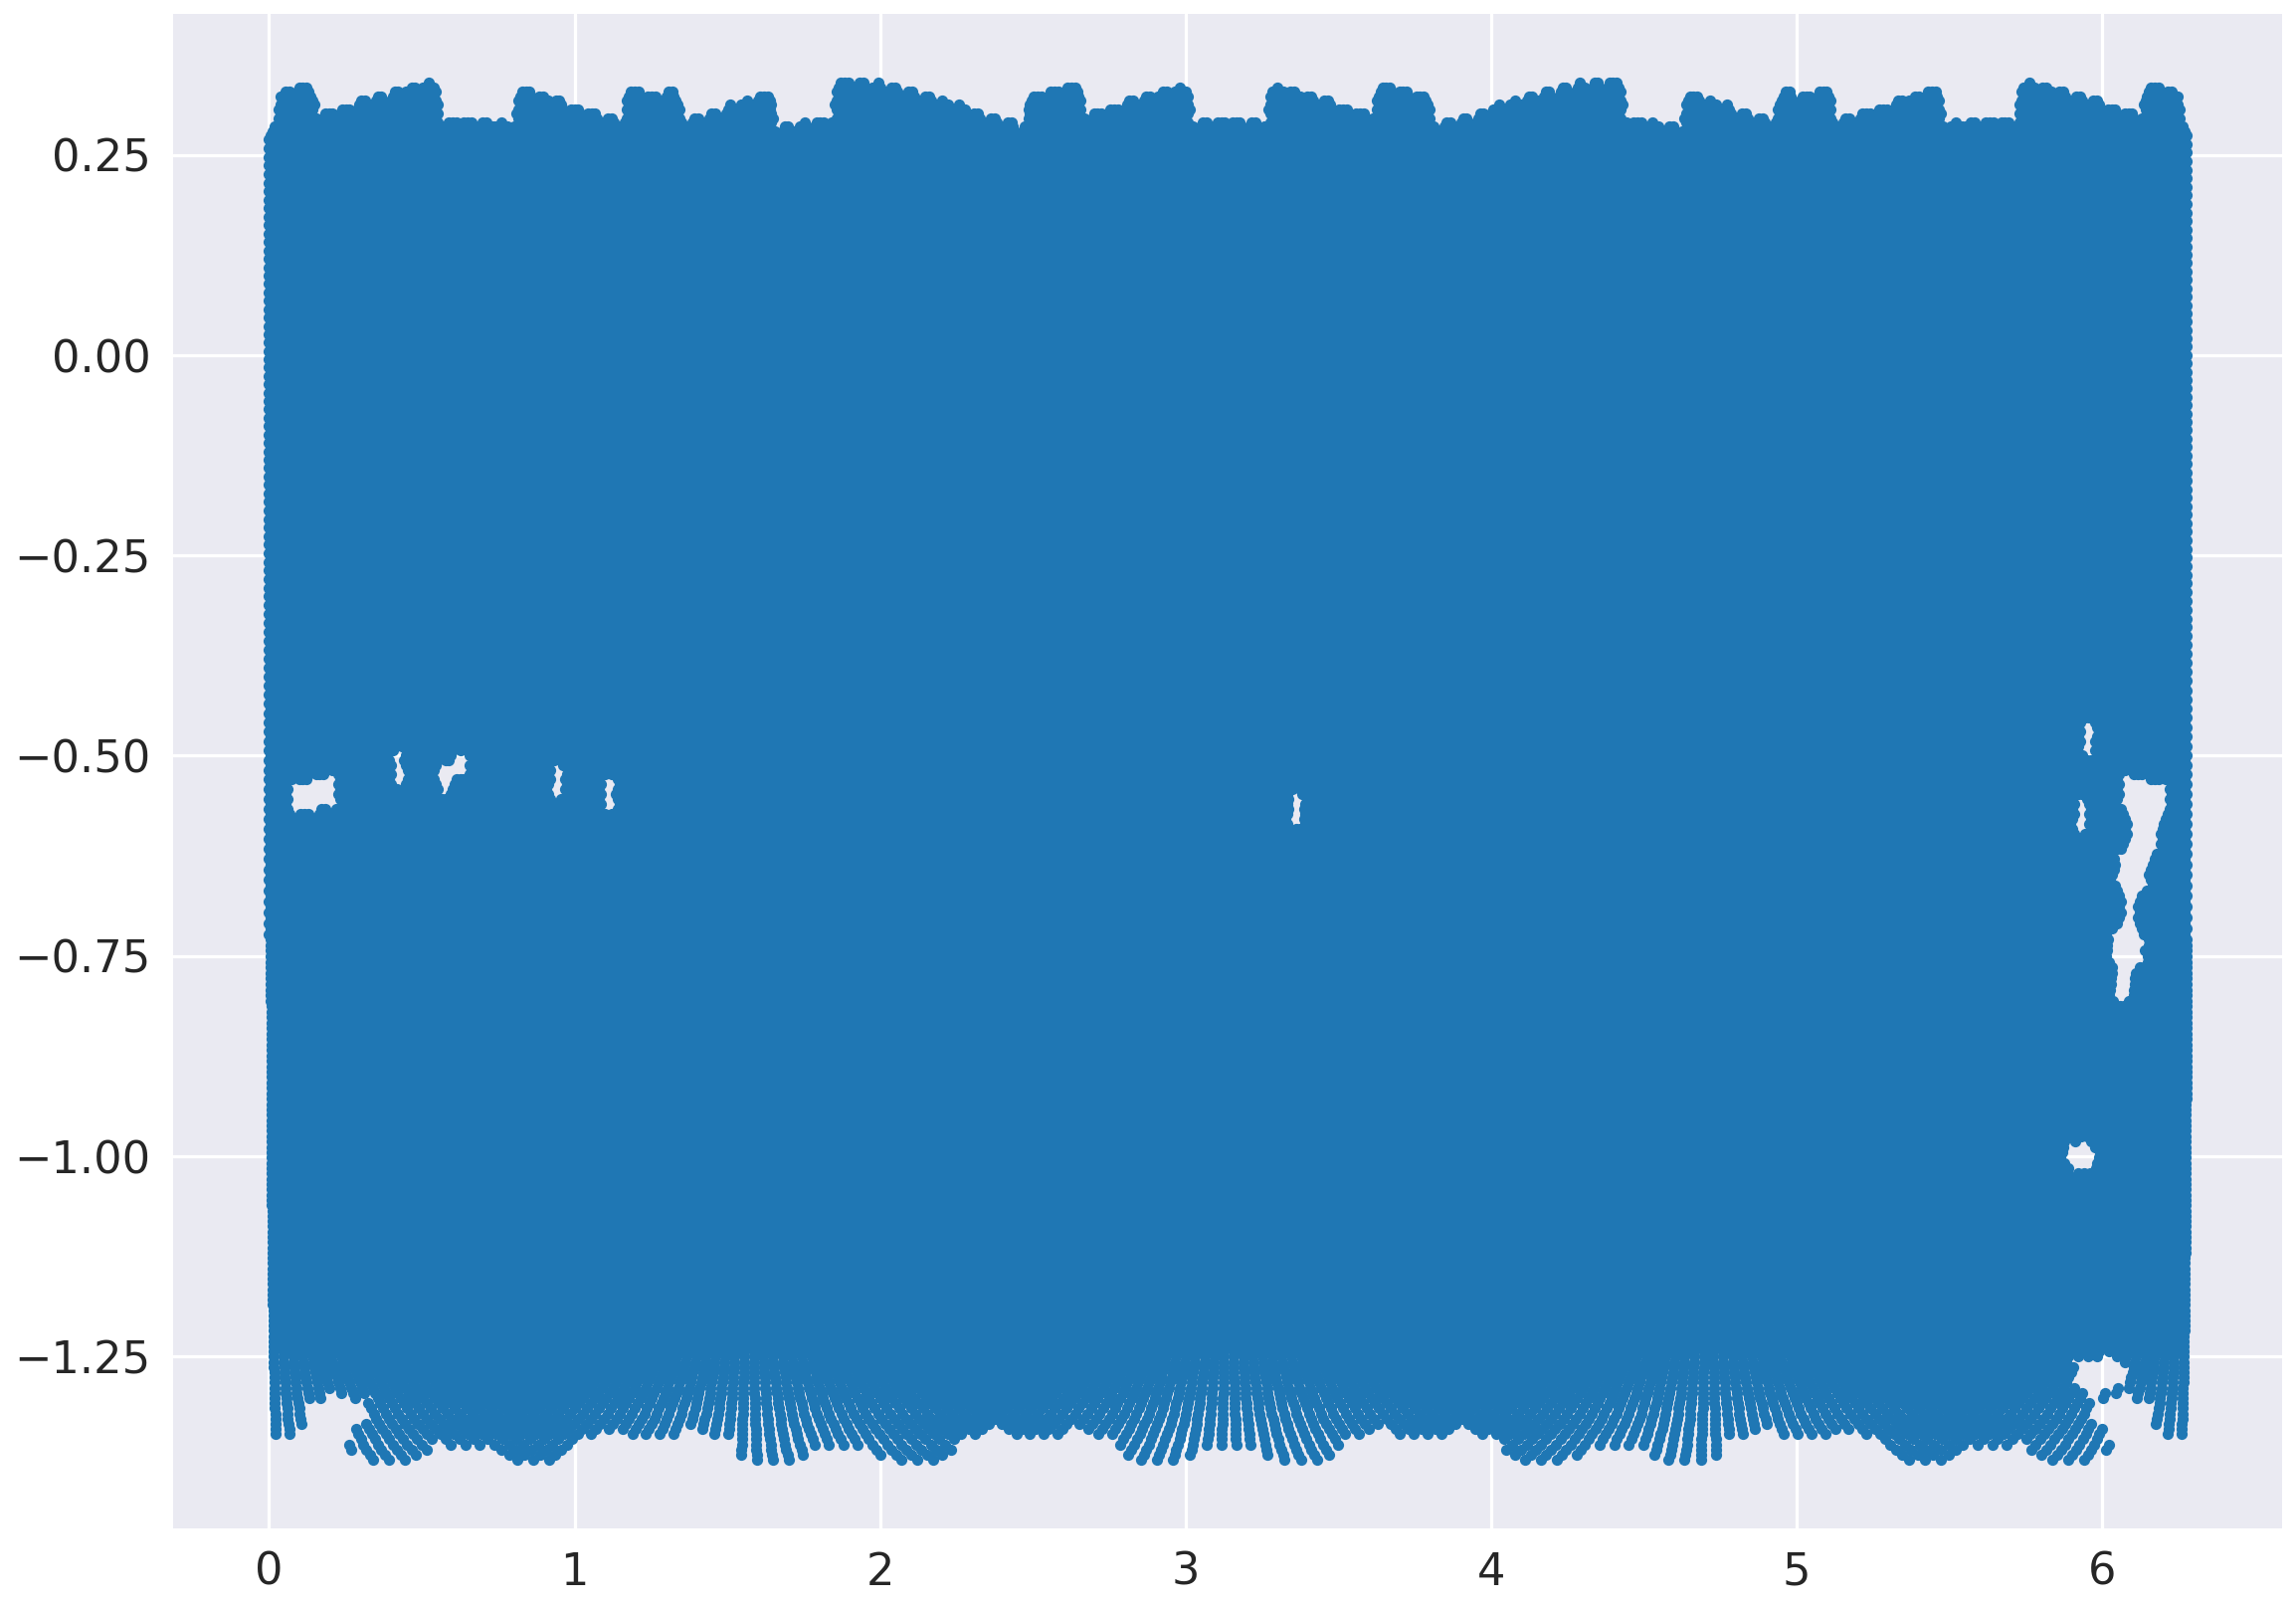

In [109]:
condx, condy = (bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond]
conds = [np.array([condxi,condyi]) for condxi, condyi in zip(condx,condy)]

In [110]:
a = np.array(random.sample(conds*100,500000))+np.random.normal(0,0.009,(500000,2))

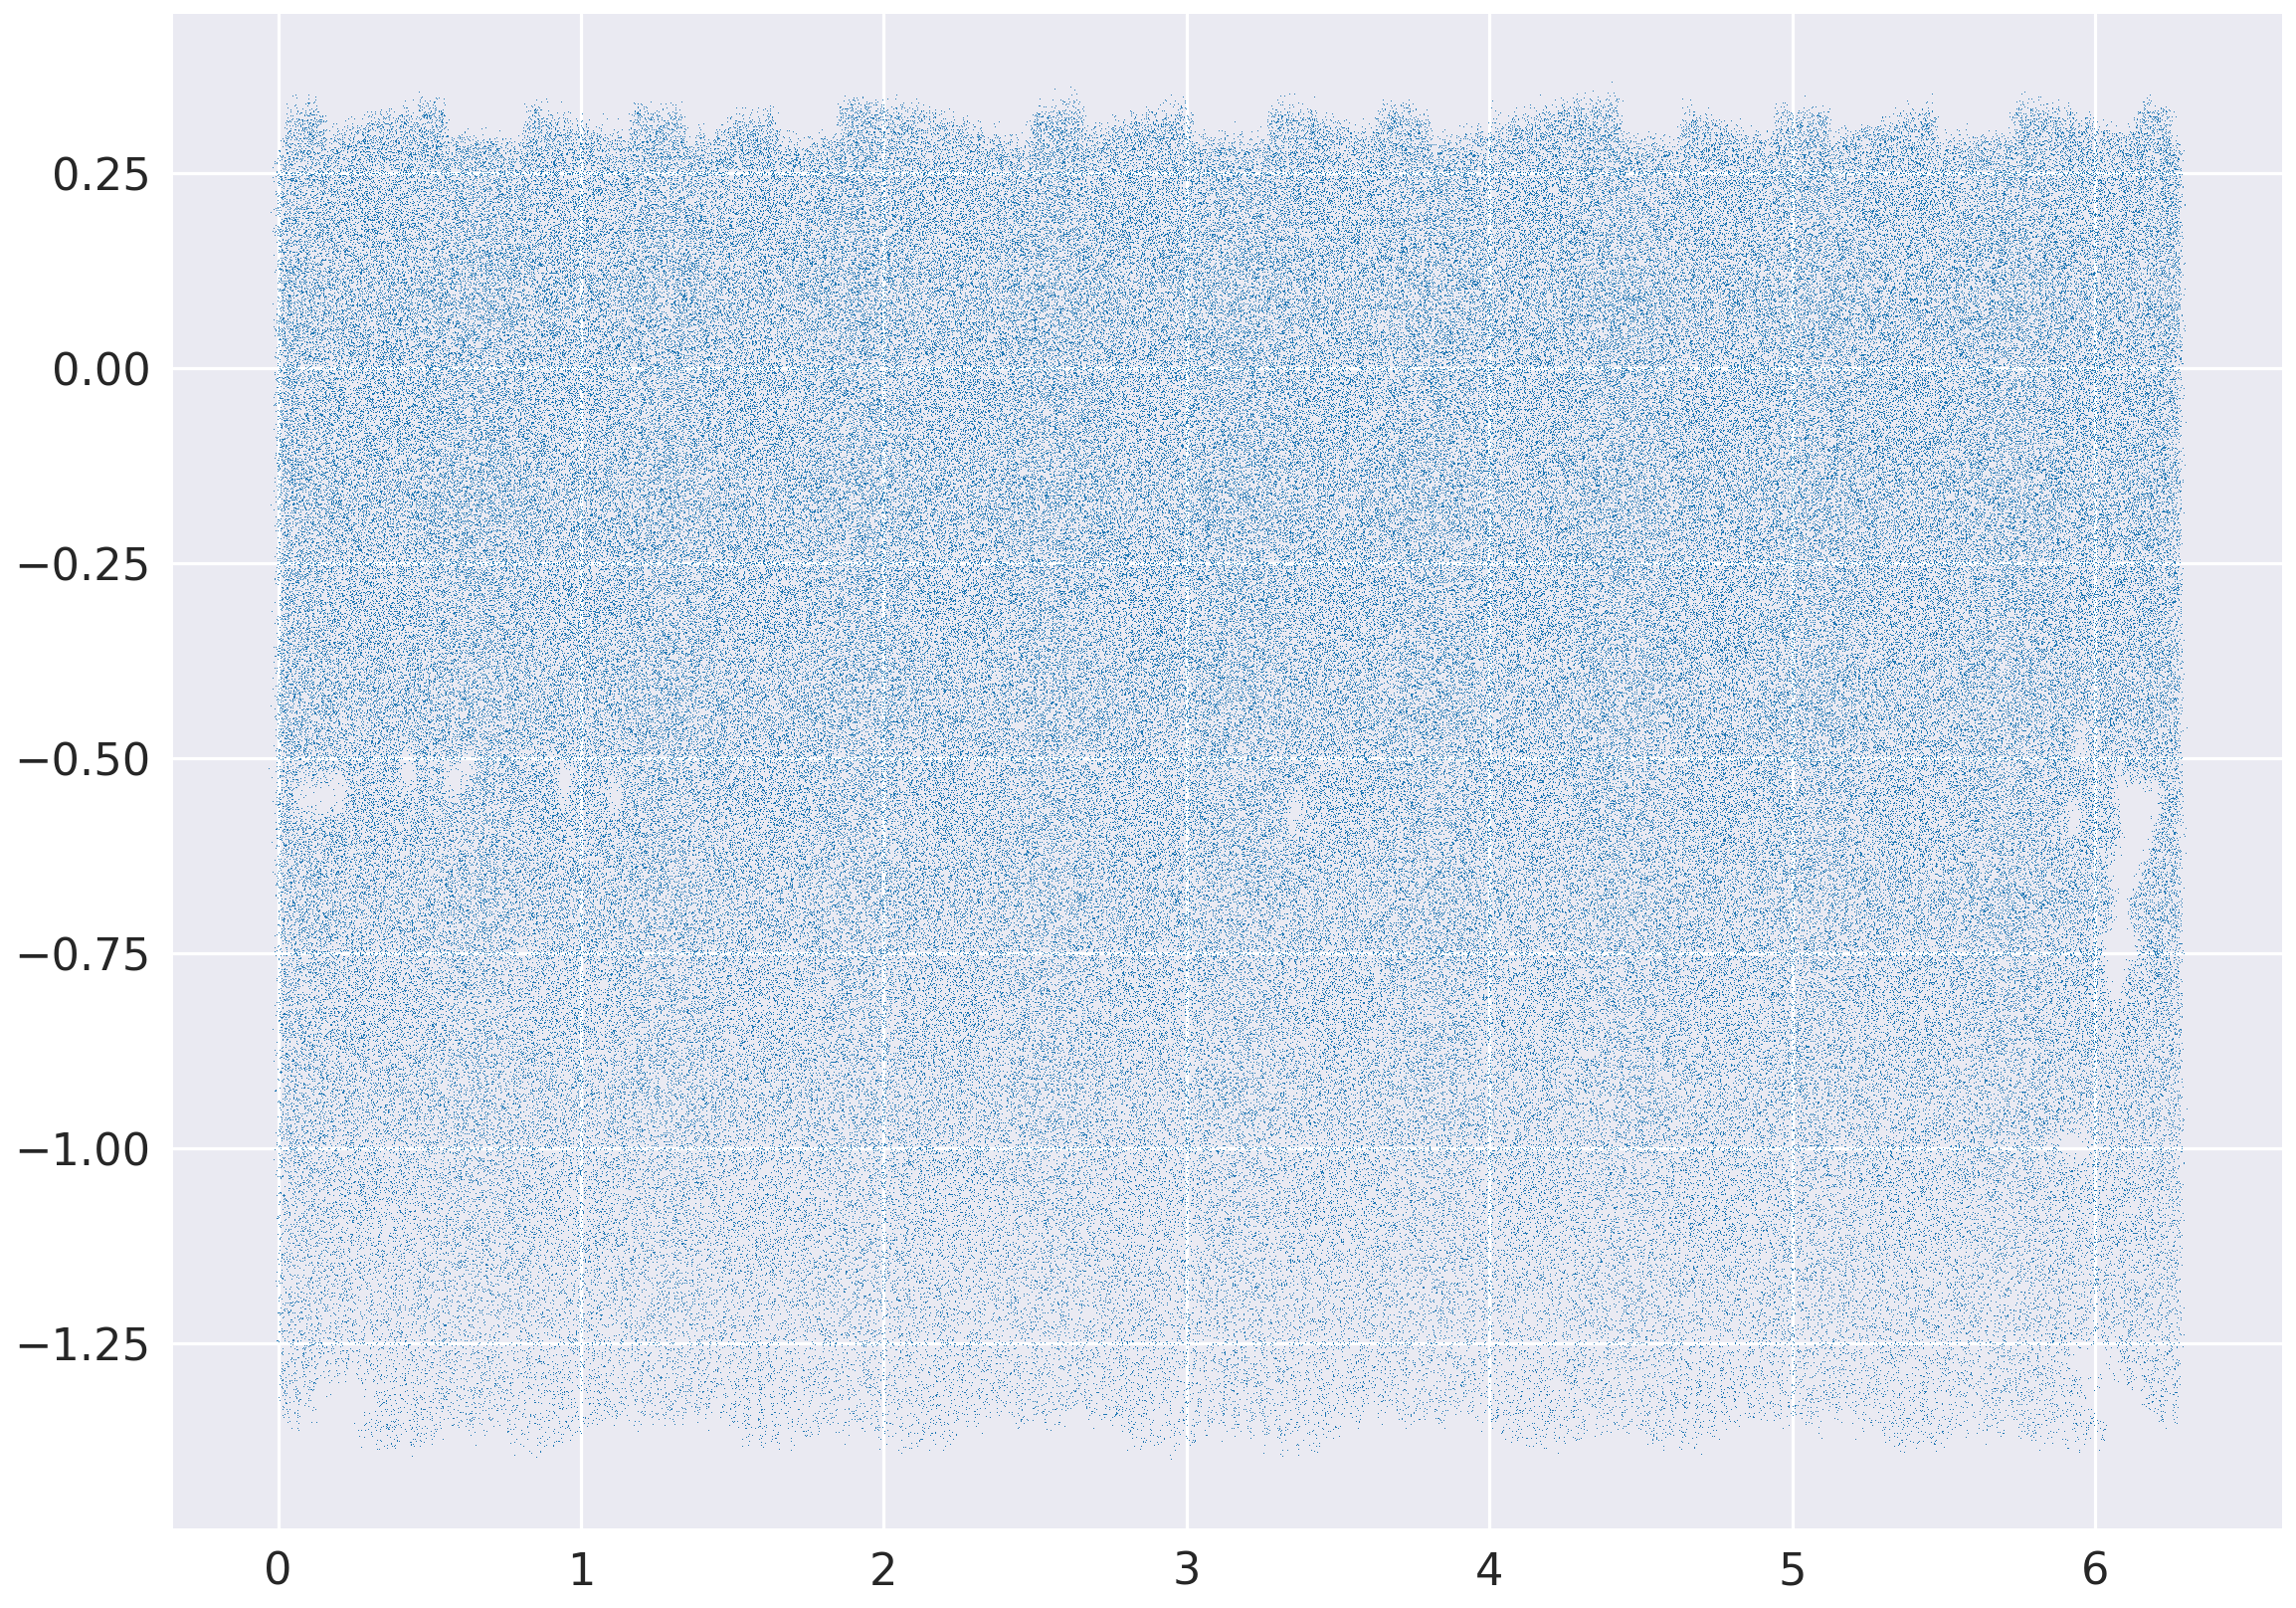

In [111]:
plt.plot(a[:,0],a[:,1],',')

In [112]:
np.save(runName+'.npy',a)

In [54]:
ls /global/cscratch1/sd/husni/OpsimRuns/

alt_sched.db       feature_baseline.npy                mothra_2045.db
baseline2018a.db   feature_baseline_update_10yrsv2.db  mothra_2045.npy
baseline2018a.npy  feature_baseline_y1.npy             pontus_2002.db
colossus_2664.db   kraken_2026.db                      pontus_2002.npy
colossus_2664.npy  kraken_2026.npy                     pontus_2489.db
colossus_2665.db   kraken_2035.db                      pontus_2489.npy
colossus_2665.npy  kraken_2035.npy                     pontus_2502.db
colossus_2667.db   minion_1012_sqlite.db               pontus_2502.npy
colossus_2667.npy  minion_1016_sqlite.db
